In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import ugradio as ug 


In [12]:
import numpy as np

def _compute_dft(in_x,in_y,out_x,inverse=False):
    if not inverse:
        in_y = np.fft.fftshift(in_y) 
        j = -1j
    else:
        in_y = np.array([i*(1.0/len(in_x)) for i in in_y])
        j = 1j

    N = len(in_x)
    out_y = np.zeros(len(out_x),dtype=np.complex128)
    for k,f in enumerate(out_x):
        out_y[k] = np.sum(in_y*np.exp(2*j*np.pi*f*in_x))

    return out_y
            
def dft(xt,t=[],f=[],vsamp=12.5e6):
    """
    Input 
    -----
    xt    : complex array, input time domain signal
    t     : (opt.) real array, input sample times. 
    f     : (opt.) real array, output sample frequencies
    vsamp : (opt.) float, sampling frequency
            default: 1
    Output
    ------
    Fx    : The discrete fourier transform of the input array

    """
    N = len(xt)
    if (len(t)):
        assert(len(t) == N), "Samples and sample times do not match!"
    else:
        t = np.linspace(-N/(2.0*vsamp),N/(2.0*vsamp),num=N,endpoint=False)

    if not (len(f)):
        vsamp = N/float(np.ceil(t.max() - t.min()))
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)
    
    Fx = _compute_dft(t,xt,f)

    return f,Fx

def idft(Fx,f=[],t=[],vsamp=12.5e6):
    """
    Input
    -----
    Fx    : complex array, input frequency domain signal
    f     : (opt.) real array, input sample frequencies
    t     : (opt.) real array, output sample times
    
    Output
    ------
    xt: The time domain signal of the input array

    """
    N = len(Fx)
    if (len(f)):
        assert(len(f) == N), "Samples and sample frequencies do not match!"
    else:
        f = np.linspace(-vsamp/2.,vsamp/2.,num=N,endpoint=False)

    if not (len(t)):
        T = N/float(np.ceil(f.max()) - f.min())
        t = np.linspace(-T/2.0,T/2.0,num=N,endpoint=False)
    
    xt = _compute_dft(f,Fx,t,inverse=True)

    return t,xt



In [13]:
ARR = []
for i in range(1,10):
    name = "lab1" + '_%s' % i + '0p_1' + '.npy' 
    ARR.append(np.load(name))
   
  

In [14]:
##NYQUIST CRITERION 



In [15]:
def digital_sampling_normalize(N):
    v_samp=12.5
    t = np.linspace(0,0.08*N,N)
    for i in range(1,10):
        plt.figure(figsize=(10,10))
        lit = 211
        plt.subplot(lit)
        plt.plot(t,ARR[i-1][50:N+50]/(2**13),'b.-')
        plt.xlabel("Time  ($\mu$s)", fontsize= 20)
        plt.ylabel("Voltage (V)", fontsize = 20)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize=20)
        plt.grid(True)
        plt.show()

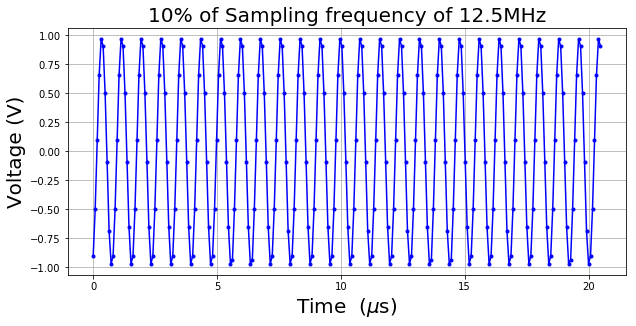

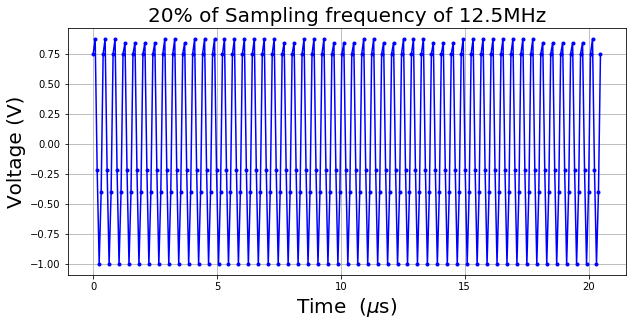

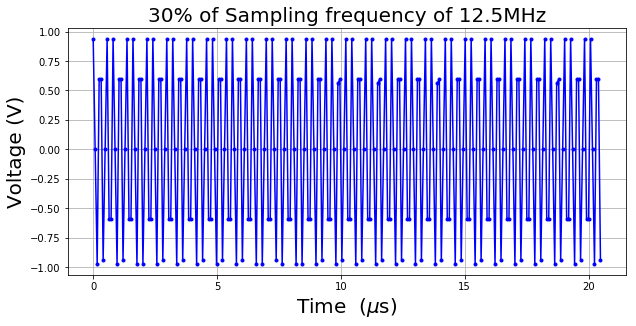

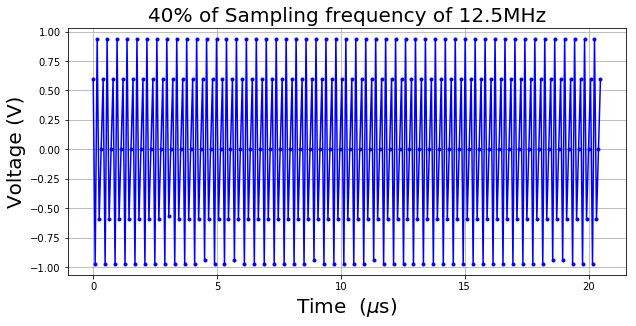

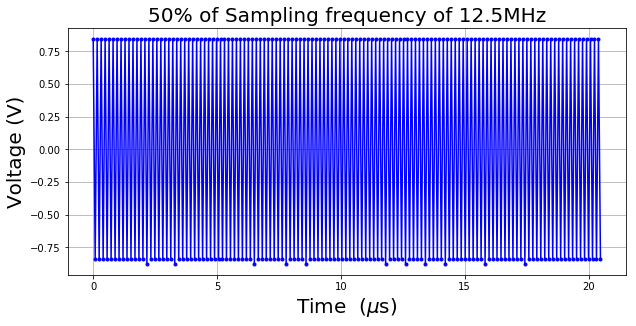

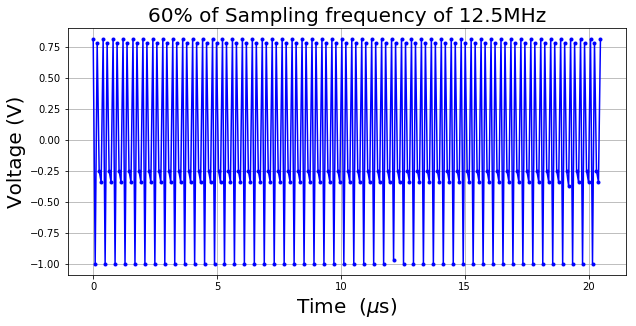

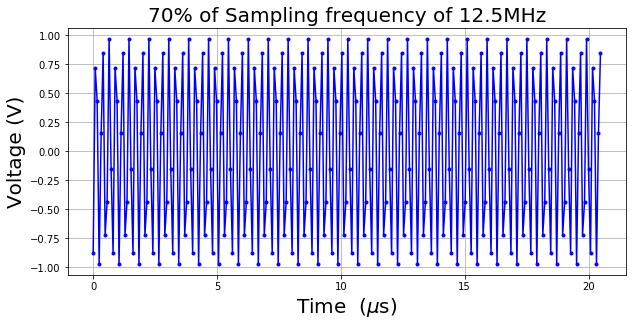

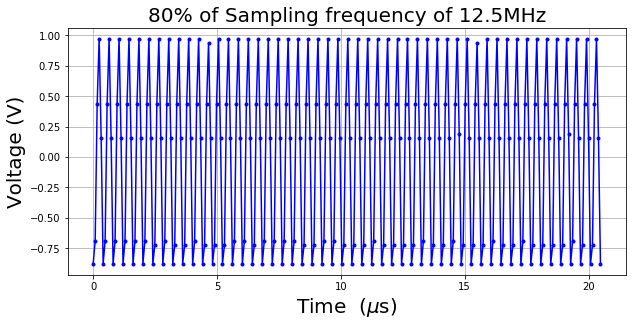

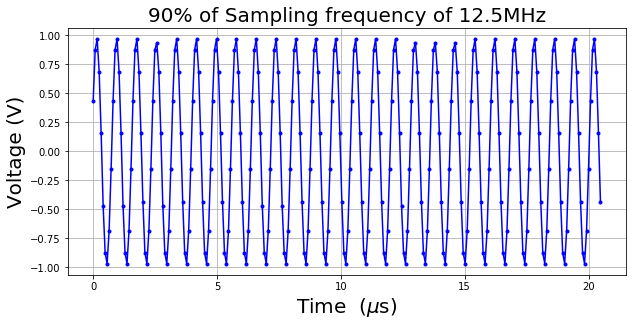

In [87]:
digital_sampling_normalize(2**8)   

In [12]:
n = 2**8
M = 2
V_samp = 12.5
f =  M*V_samp/2 + M*(1-2/n)*(V_samp/2)
print(f)

24.90234375


In [13]:
##VOLTAGE SPECTRUM 

In [16]:
def voltage_spectrum( N):
   
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    REAL = []
    IMAG = []
    for i in range(1,10):
        F = dft(ARR[i-1][50:N+50]/2**13,t,f,vsamp=12.5e6)
        real = []
        imag = []
        REAL.append(real)
        IMAG.append(imag)
        for num in F[1]:
            real.append(num.real)
            imag.append(num.imag)
    return REAL, IMAG
        



In [17]:
def get_VS_plots(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    for i in range(1,10):
  
        plt.figure(figsize=(10,10))
        yee = 311
        plt.subplot(yee)
        plt.plot(f/1e6,voltage_spectrum(N)[0][i-1],'r.-')
        plt.plot(f/1e6,voltage_spectrum(N)[1][i-1],'b.-')
        plt.xlabel("Frequency (MHz)",fontsize=20)
        plt.ylabel("(V$\mu$s)",fontsize = 20)
        plt.title(str(i) + "0% of Sampling frequency of 12.5 MHz",fontsize=20)
        plt.legend(['real voltage spectrum','imaginary voltage spectrum'],loc='upper right',fontsize=8)
        plt.show()
    

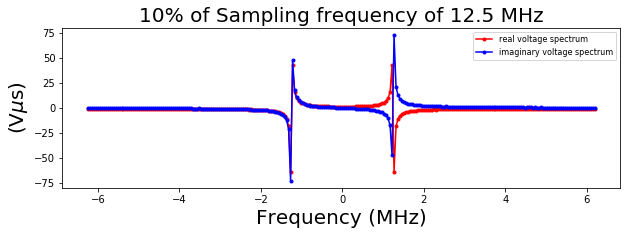

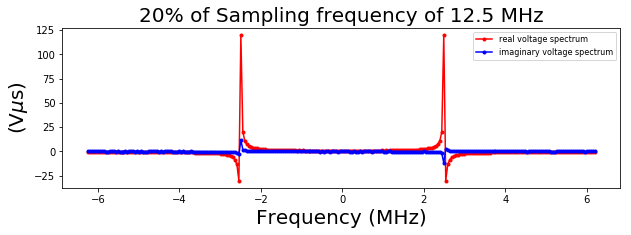

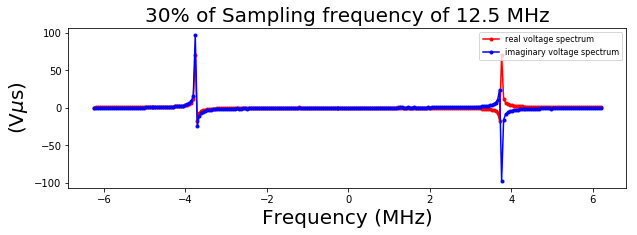

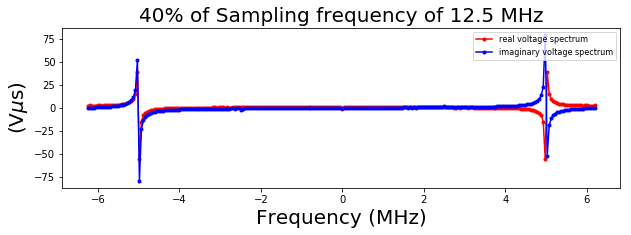

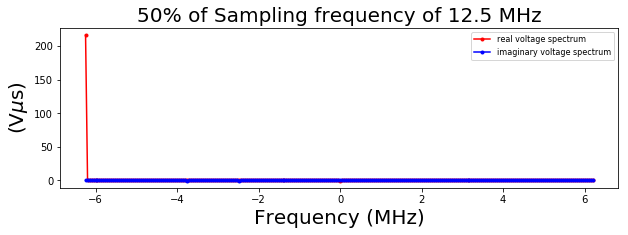

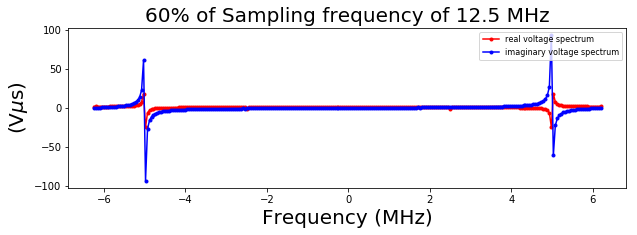

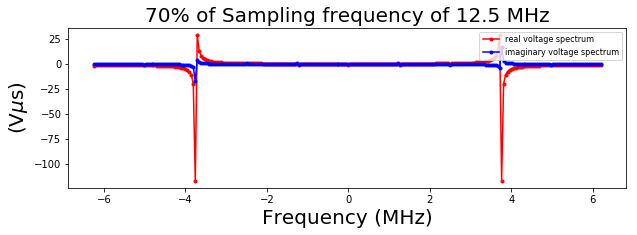

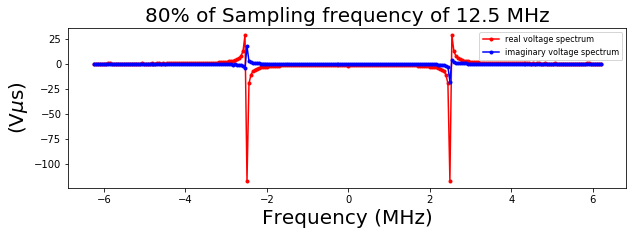

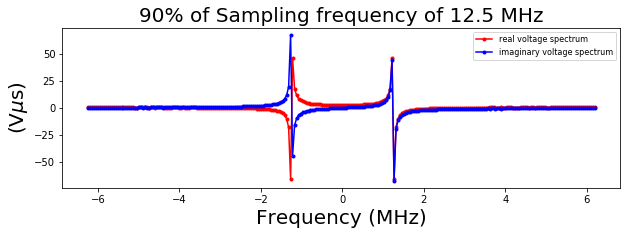

In [118]:
get_VS_plots(2**8)

In [17]:
##POWER SPECTRUM 

In [76]:
def power_spectra(N):
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,10):
        pf = []
        EF = dft(ARR[i-1][50:N+50]/2**13,t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    return PF


In [77]:
def get_PS_plots(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    for i in range(1,10):
        plt.figure(figsize=(10,10))
        lit = 311
        plt.subplot(lit)
        plt.plot(f/1e6,power_spectra(N)[i-1],'b.-')
        plt.xlabel("Frequency in (MHz)", fontsize= 20)
        plt.ylabel("(V$\mu$s)$^2$", fontsize = 20)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize=20)
        plt.show()
    

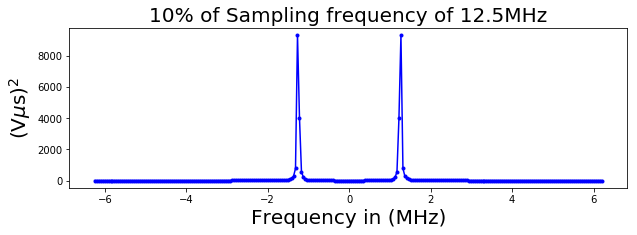

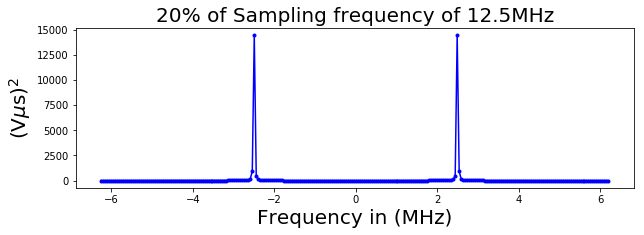

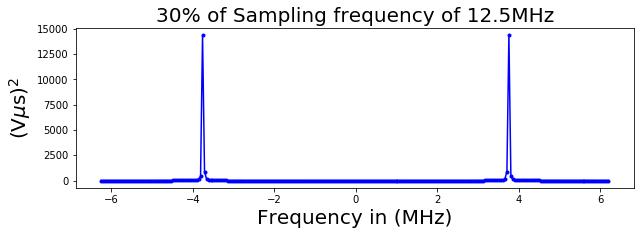

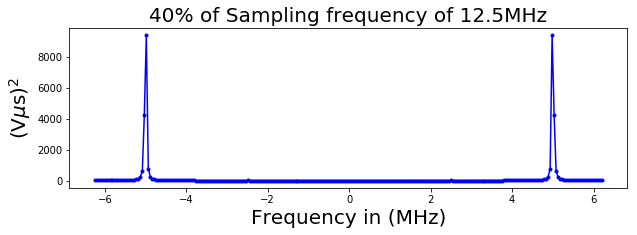

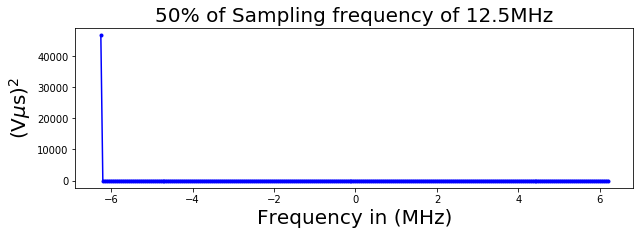

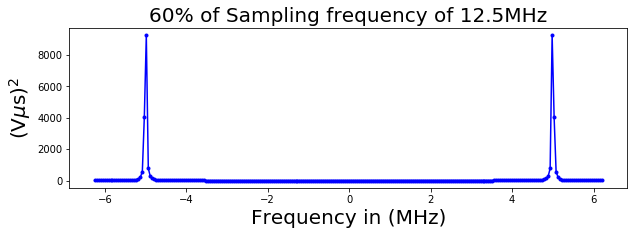

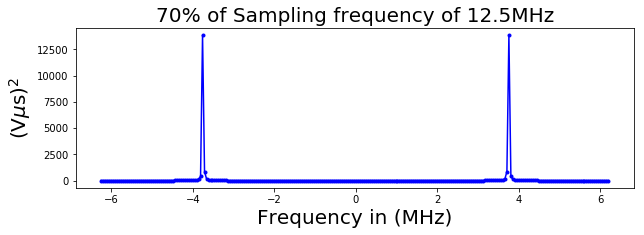

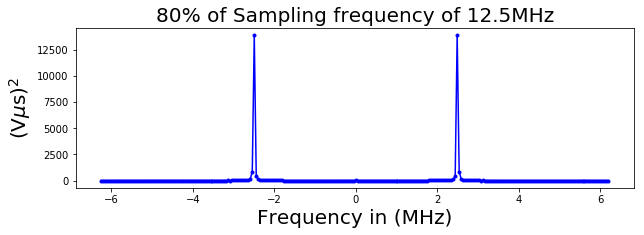

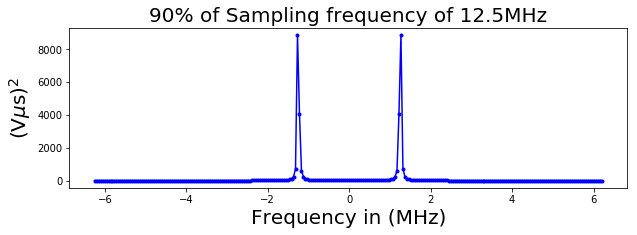

In [123]:
get_PS_plots(2**8)

In [21]:
##POWER LEAKAGE

In [ ]:
def get_PS_plots_leaks(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    for i in range(1,10):
        plt.figure(figsize=(10,5))
        plt.plot(f/1e6,power_spectra(N)[i-1],'r.-')
        plt.xlabel("Frequency in (MHz)", fontsize= 20)
        plt.ylabel("(V$\mu$s)$^2$", fontsize = 20)
        plt.ylim(0,20)
        plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize=20)
        plt.show()
    

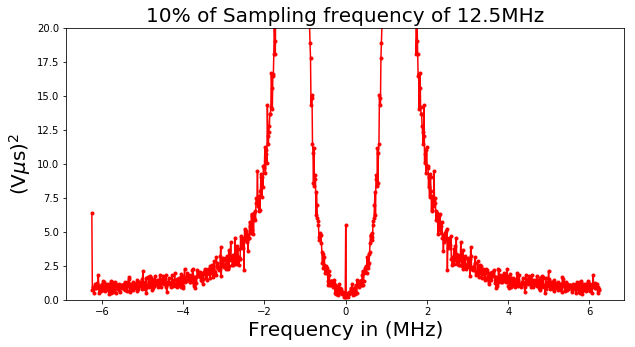

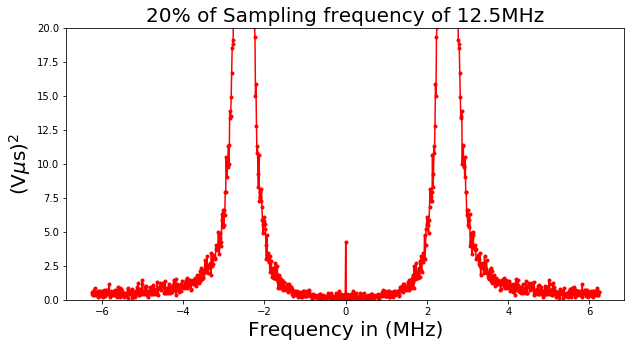

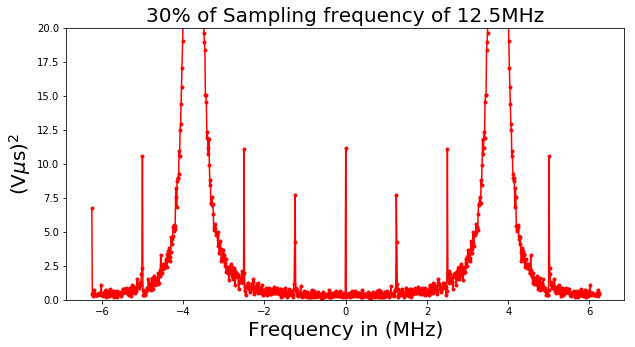

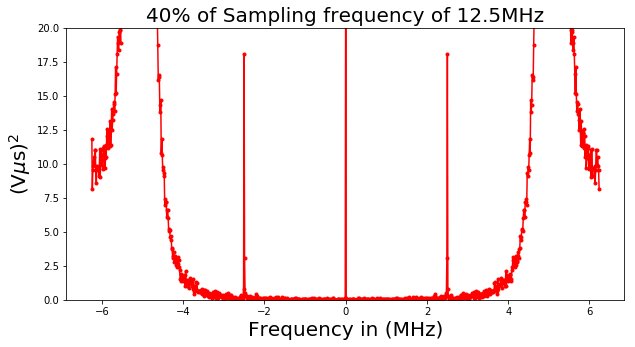

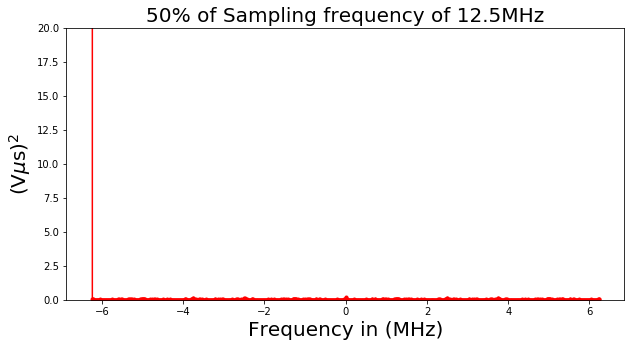

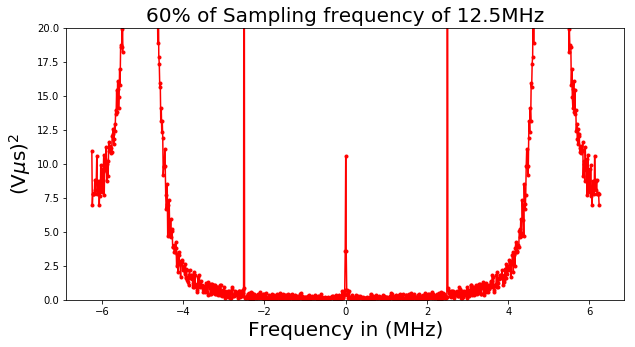

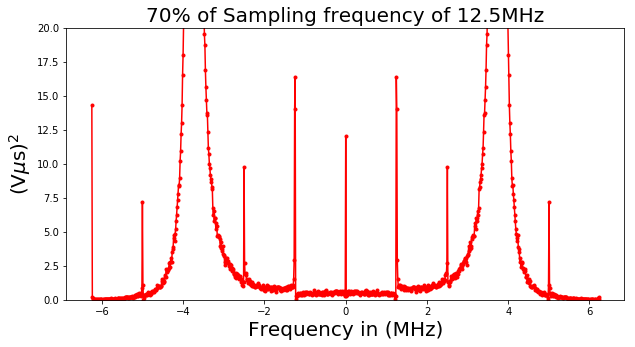

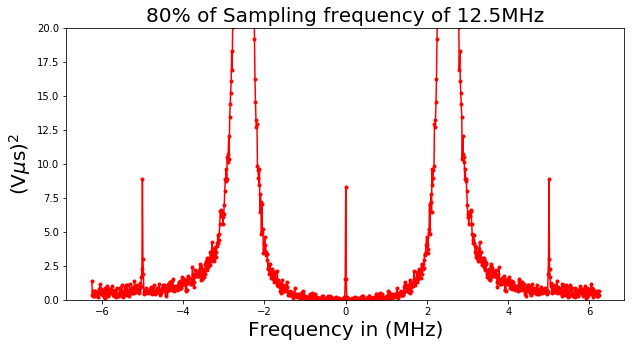

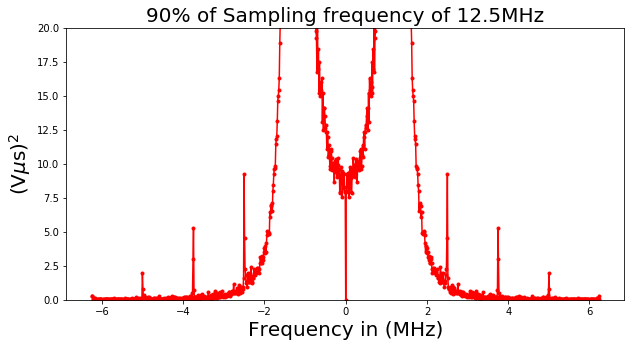

In [139]:
get_PS_plots_leaks(2**10)

In [24]:
##FREQUENCY RESOLUTION 

In [69]:
data = np.load('3.5data.npy')
data = data/2**15
N = 2**10


In [70]:
def power_spectra_resolution(N):
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
  
    EF = dft(data[0:N],t,f,vsamp=12.5e6)
    for comp in EF[1]:
        PF.append(np.abs(comp)**2)
    return PF

In [71]:
def get_PS_plots(N):
    v_samp = 12.5e6
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    plt.figure(figsize=(10,5))
    plt.plot(f/1e6,power_spectra_resolution(N),'r.-')
    plt.xlabel("Frequency in (MHz)", fontsize= 20)
    plt.ylabel("(V$\mu$)$^2$", fontsize = 20)
    plt.xlim(3.5,5.5)
    plt.show()
    

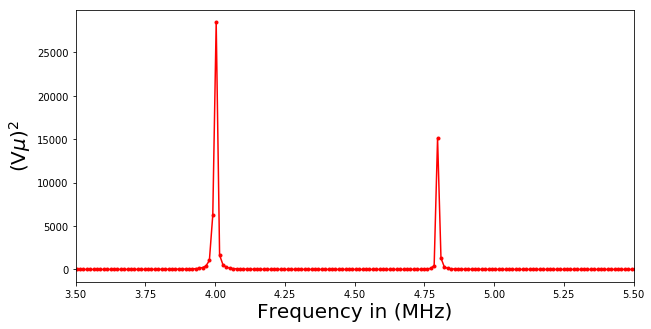

In [72]:
get_PS_plots(N)

###NYQUIST WINDOW 

In [73]:
def voltage_spectrum(N,n):
    
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-n*v_samp/2,(1-2/N)*(n*v_samp/2),N)  #output sample frequency domain 
    REAL = []
    IMAG = []
    for i in range(1,10):
        F = dft(ARR[i-1][50:N+50]/2**13,t,f,vsamp=12.5e6)
        real = []
        imag = []
        REAL.append(real)
        IMAG.append(imag)
        for num in F[1]:
            real.append(num.real)
            imag.append(num.imag)
    return REAL, IMAG
        
def get_VS_plots(N,n):
    
    for i in range(1,n):
        v_samp = 12.5e6
        f = np.linspace(-i*v_samp/2,(1-2/N)*(i*v_samp/2),N)
  
        plt.figure(figsize=(10,5))
        plt.plot(f/1e6,voltage_spectrum(N,i)[0][1],'r.-')
        plt.plot(f/1e6,voltage_spectrum(N,i)[1][1],'b.-')
        plt.xlabel("Frequency in (MHz)",fontsize=20)
        plt.ylabel("(V$\mu$s)$^2$",fontsize = 20)
        plt.title("20% of Sampling frequency of 12.5 MHz",fontsize=20)
        plt.legend(['real voltage spectrum','imaginary voltage spectrum'],loc='upper right',fontsize=8)
        plt.show()



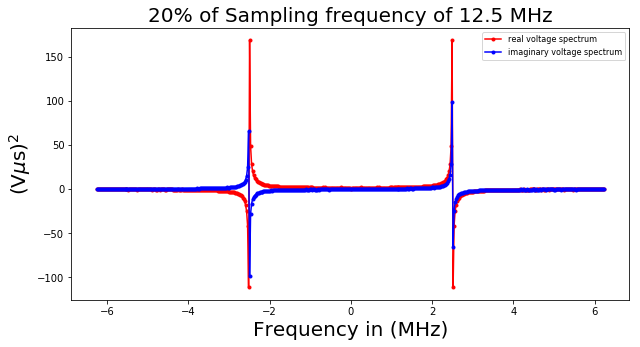

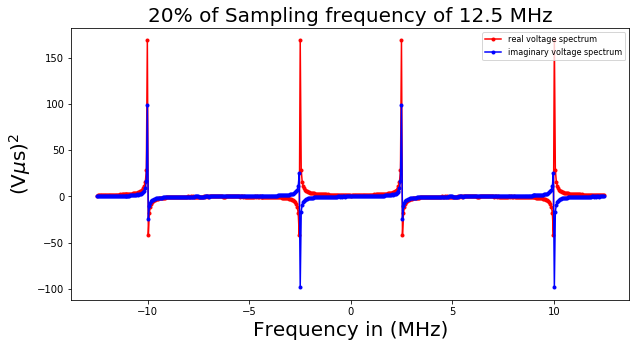

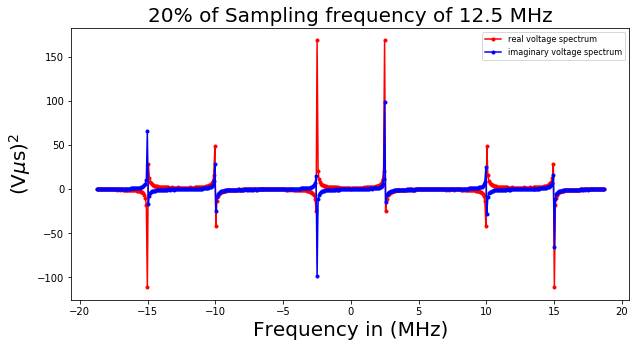

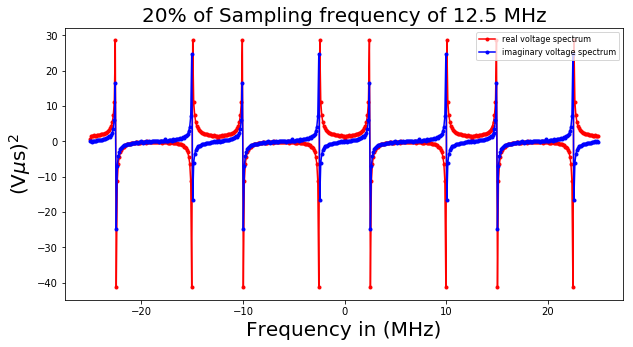

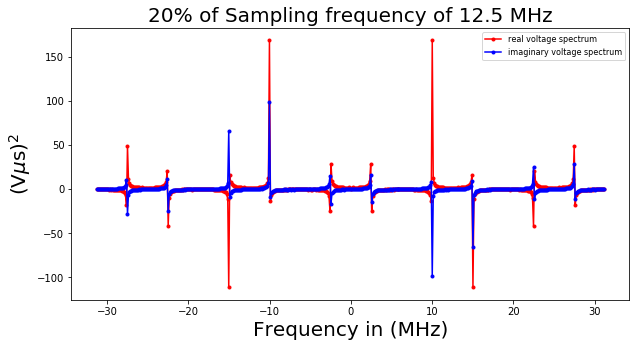

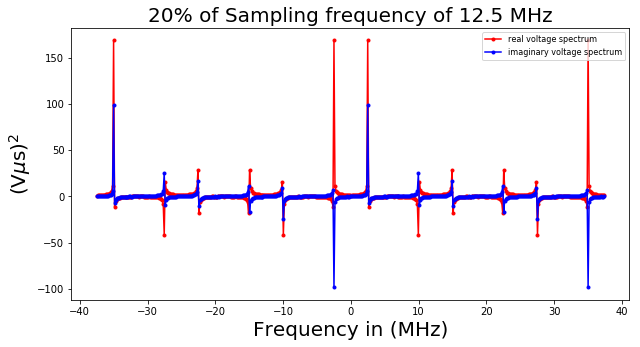

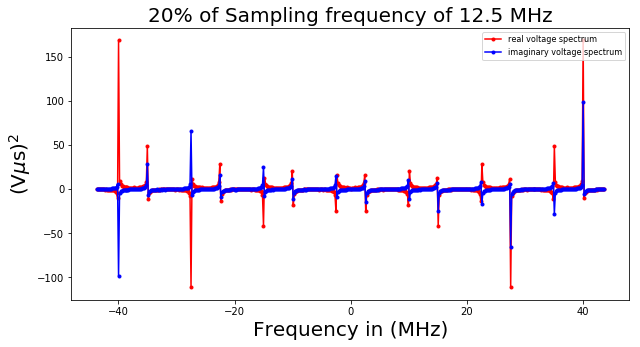

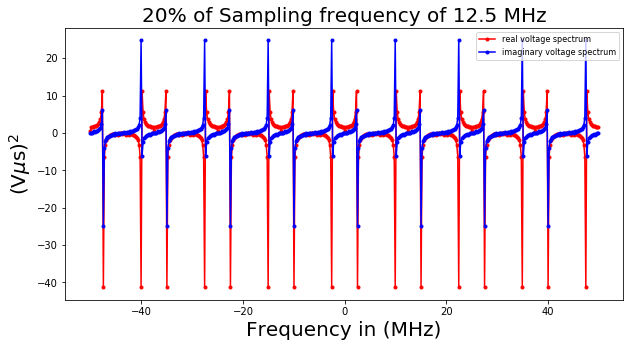

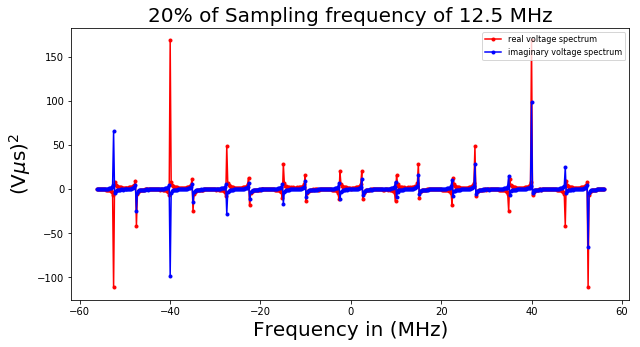

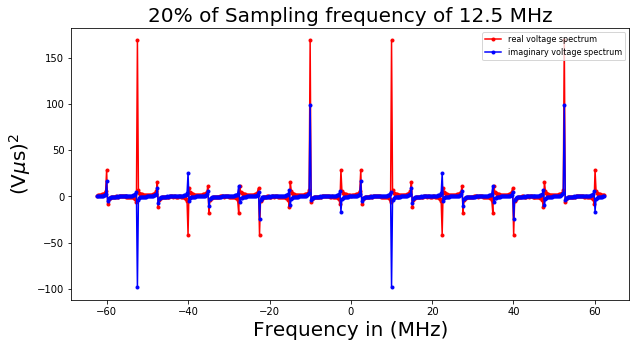

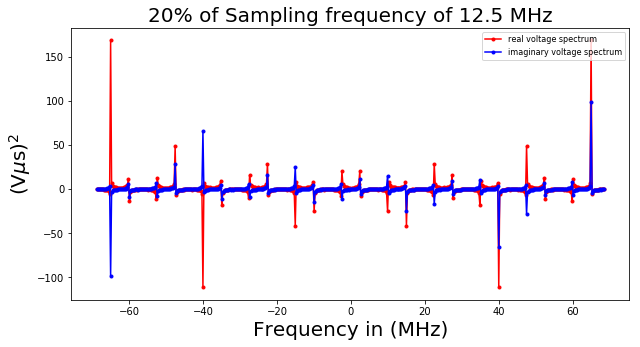

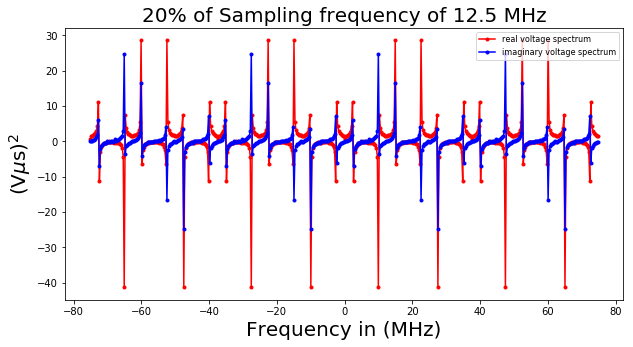

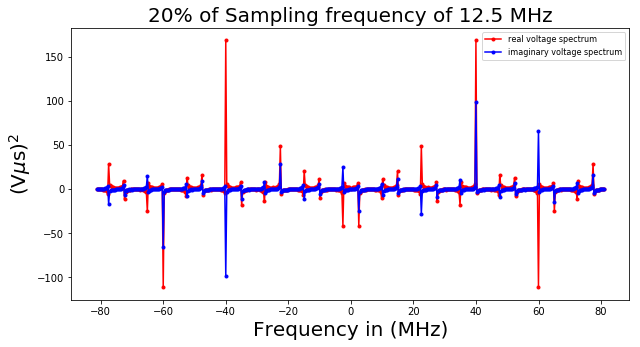

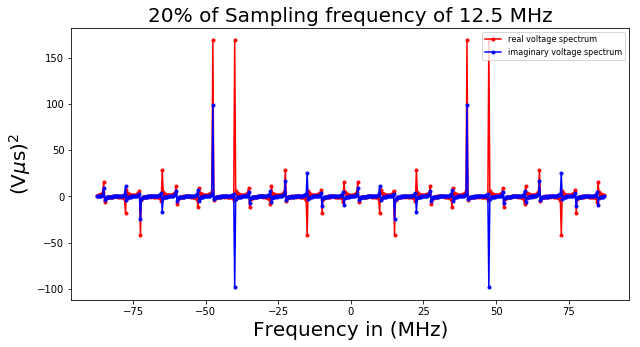

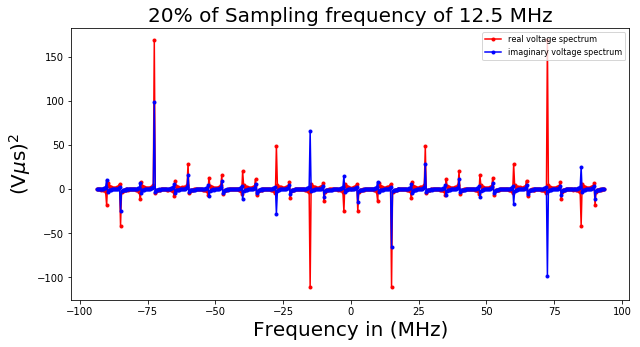

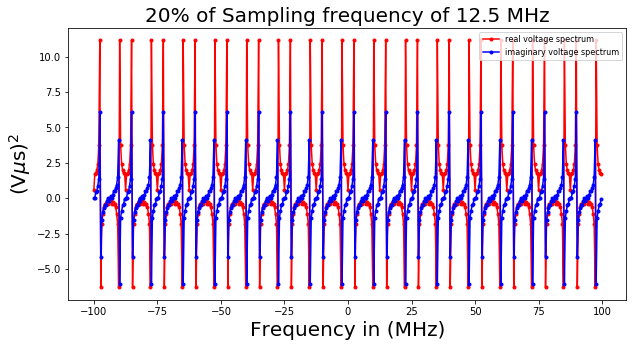

In [74]:
get_VS_plots(2**9,17)

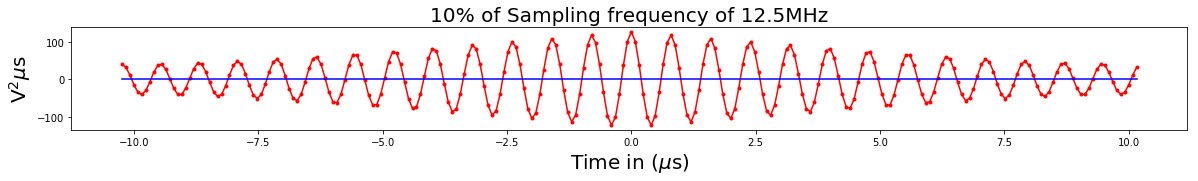

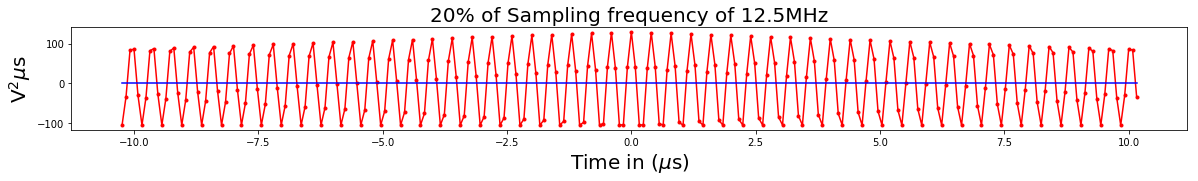

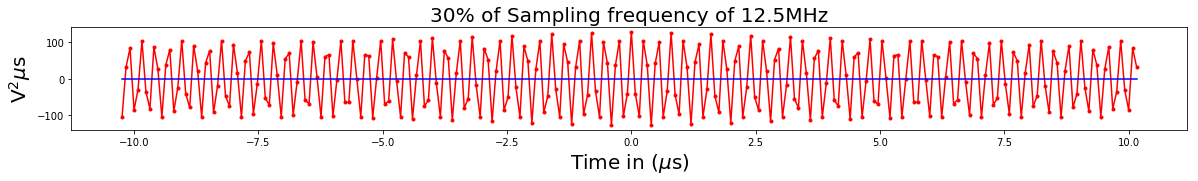

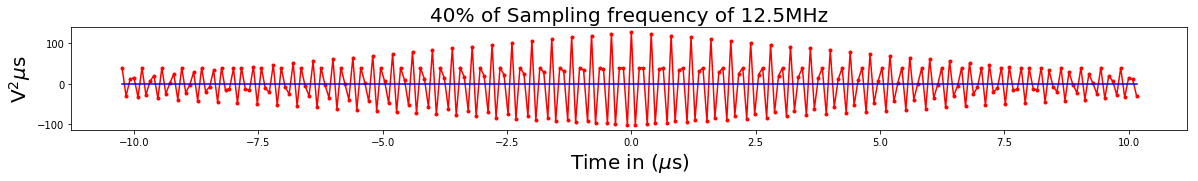

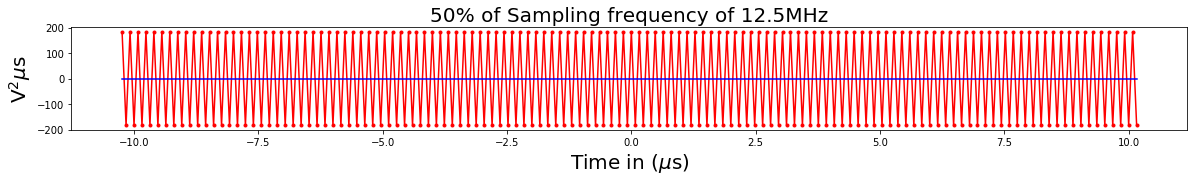

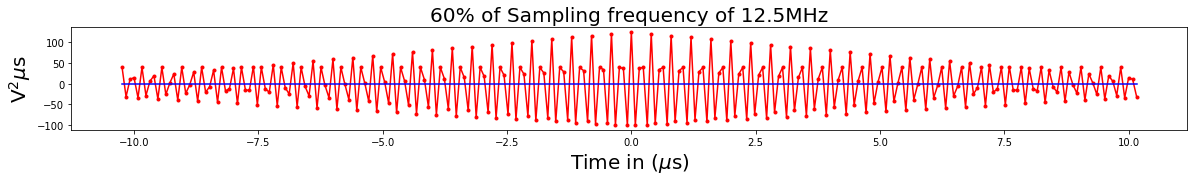

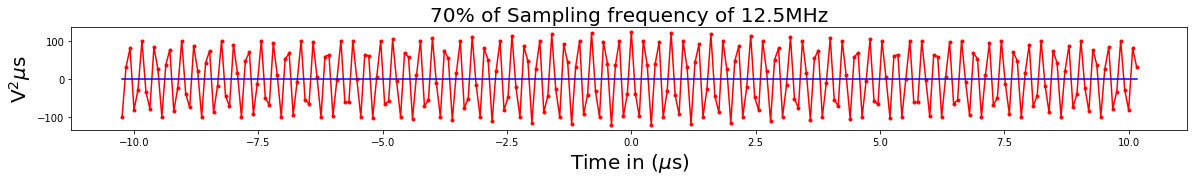

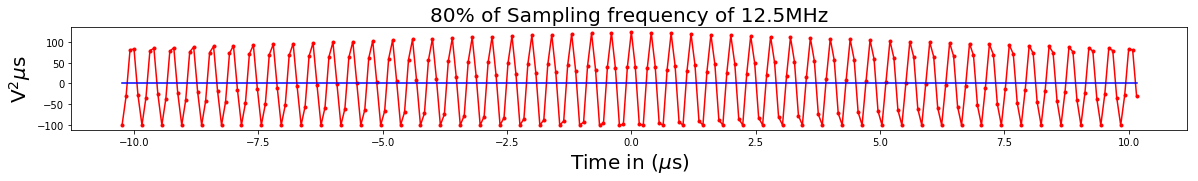

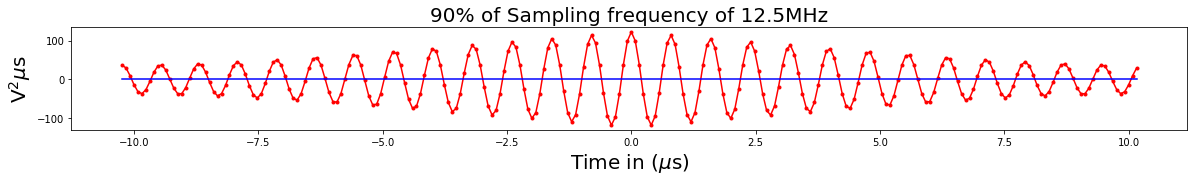

[ -1.02400000e-05  -1.01600000e-05  -1.00800000e-05  -1.00000000e-05
  -9.92000000e-06  -9.84000000e-06  -9.76000000e-06  -9.68000000e-06
  -9.60000000e-06  -9.52000000e-06  -9.44000000e-06  -9.36000000e-06
  -9.28000000e-06  -9.20000000e-06  -9.12000000e-06  -9.04000000e-06
  -8.96000000e-06  -8.88000000e-06  -8.80000000e-06  -8.72000000e-06
  -8.64000000e-06  -8.56000000e-06  -8.48000000e-06  -8.40000000e-06
  -8.32000000e-06  -8.24000000e-06  -8.16000000e-06  -8.08000000e-06
  -8.00000000e-06  -7.92000000e-06  -7.84000000e-06  -7.76000000e-06
  -7.68000000e-06  -7.60000000e-06  -7.52000000e-06  -7.44000000e-06
  -7.36000000e-06  -7.28000000e-06  -7.20000000e-06  -7.12000000e-06
  -7.04000000e-06  -6.96000000e-06  -6.88000000e-06  -6.80000000e-06
  -6.72000000e-06  -6.64000000e-06  -6.56000000e-06  -6.48000000e-06
  -6.40000000e-06  -6.32000000e-06  -6.24000000e-06  -6.16000000e-06
  -6.08000000e-06  -6.00000000e-06  -5.92000000e-06  -5.84000000e-06
  -5.76000000e-06  -5.68000000e-06

In [111]:
N = 2**8
v_samp = 12.5e6
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N)
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
for i in range(1,10):
    FF = idft(power_spectra(N)[i-1],f,t,vsamp=12.5e6)
    REAL = []
    IMAG = []
    for num in FF[1]:
        REAL.append(num.real)
        IMAG.append(num.imag)
    plt.figure(figsize=(20,20))
    lit = 910 + i
    plt.subplot(lit)
    plt.plot(t/1e-6,REAL,'r.-')
    plt.plot(t/1e-6,IMAG,'b')
    plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize=20)
    plt.xlabel('Time in ($\mu$s)',fontsize=20)
    plt.ylabel('V$^2$$\mu$s',fontsize = 20)
    plt.show()
print(t)

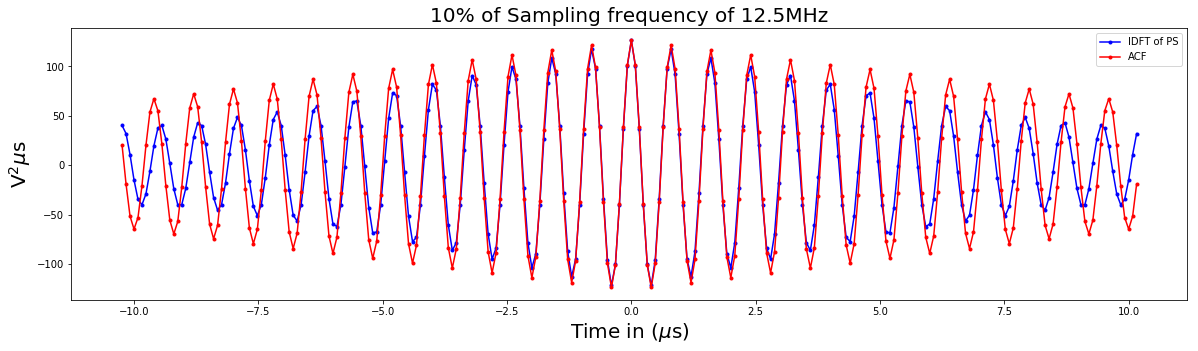

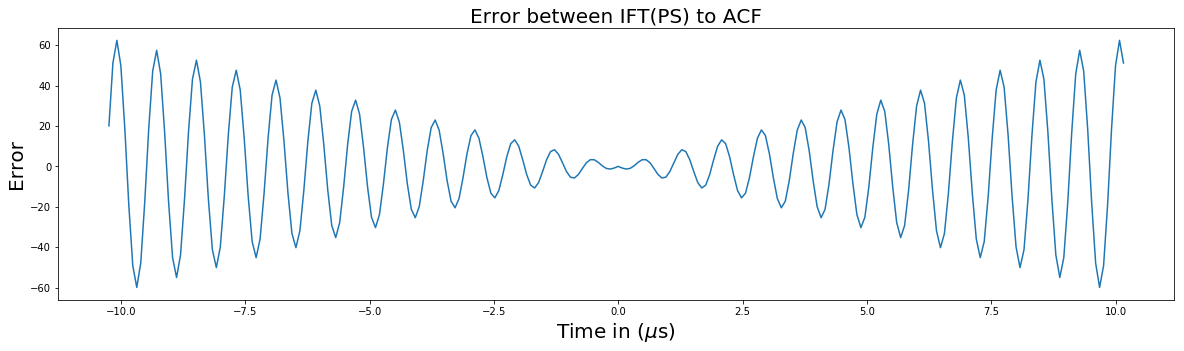

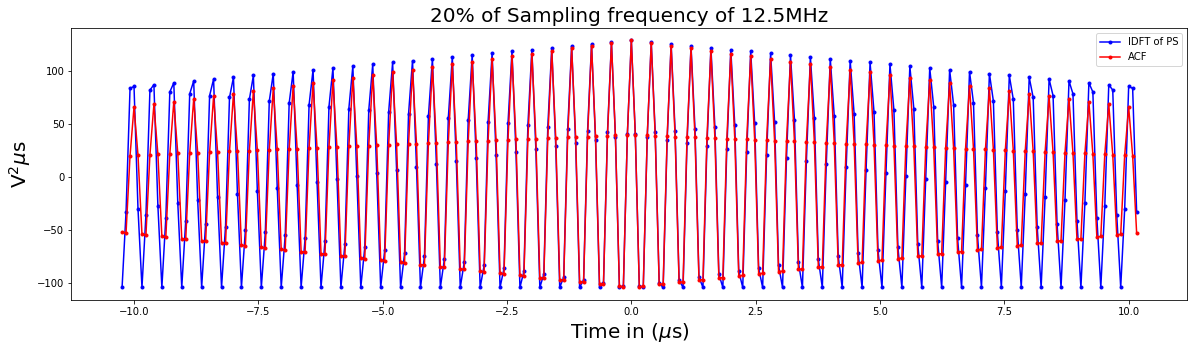

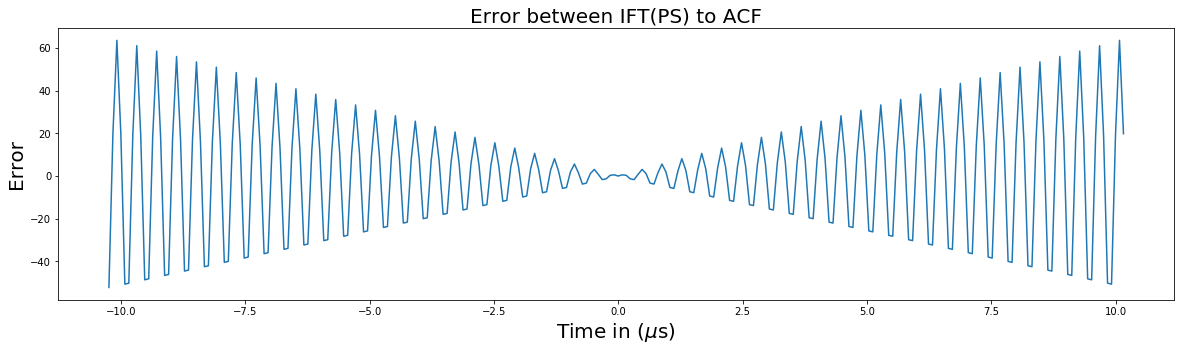

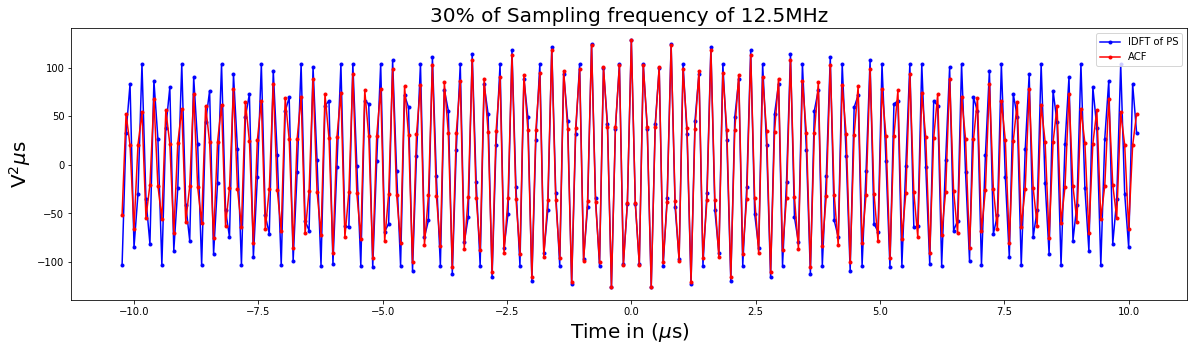

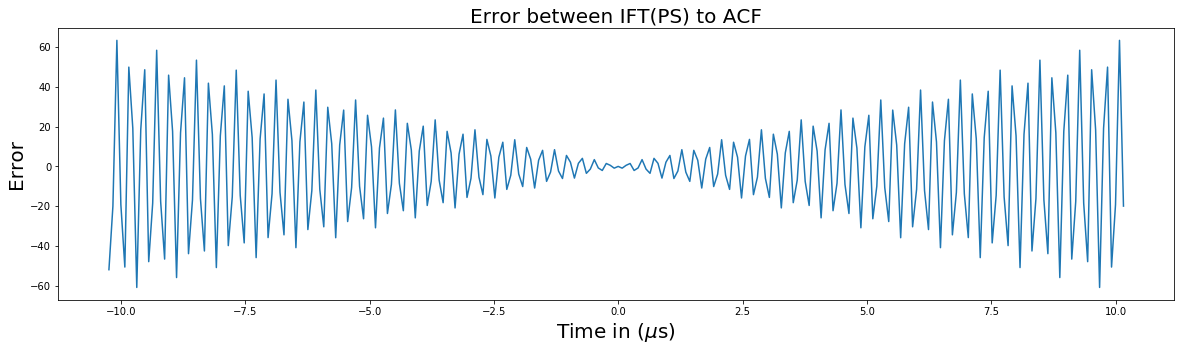

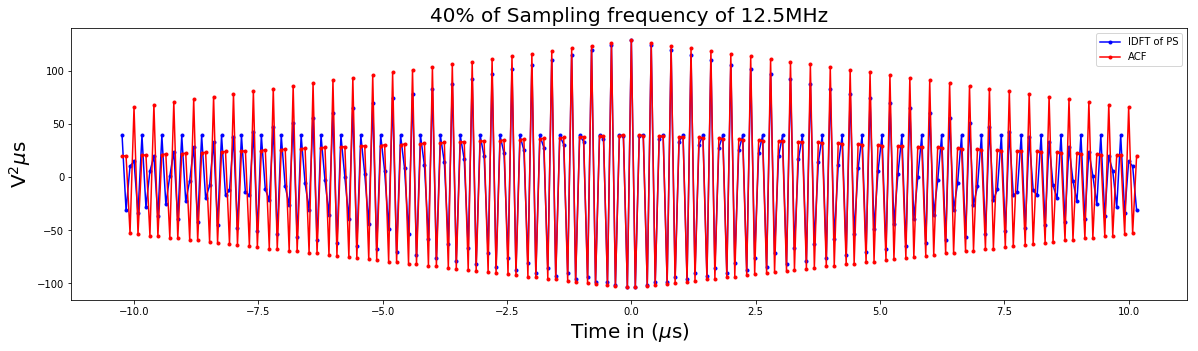

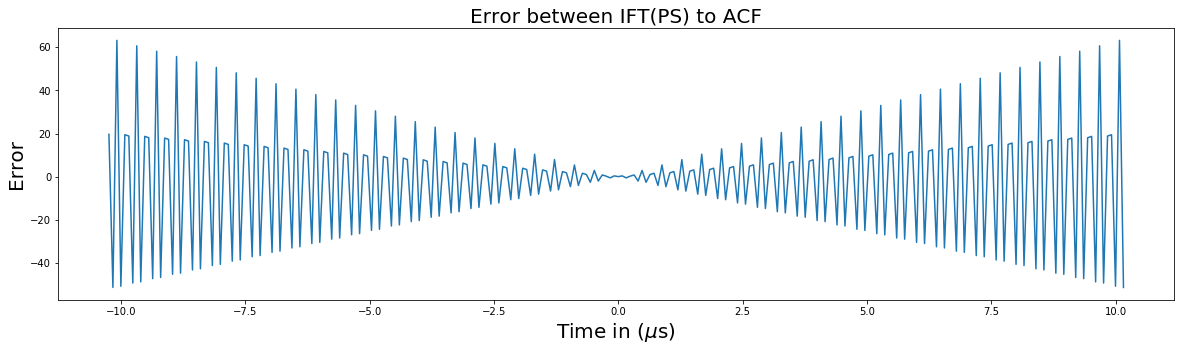

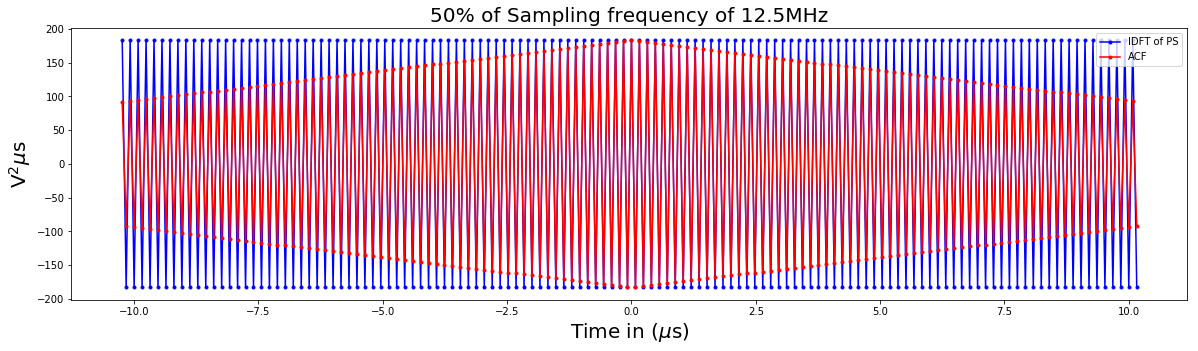

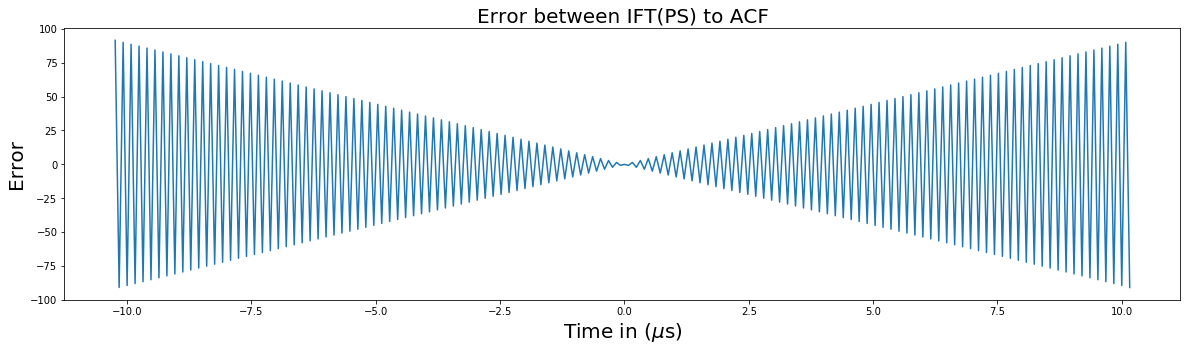

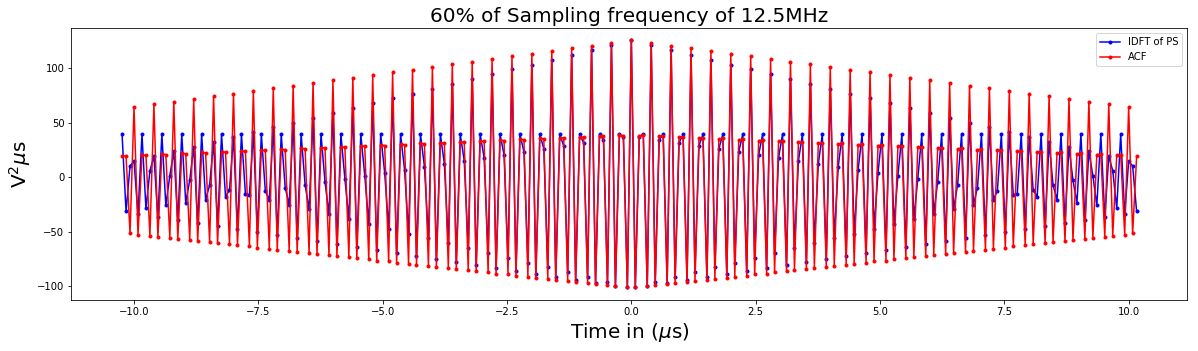

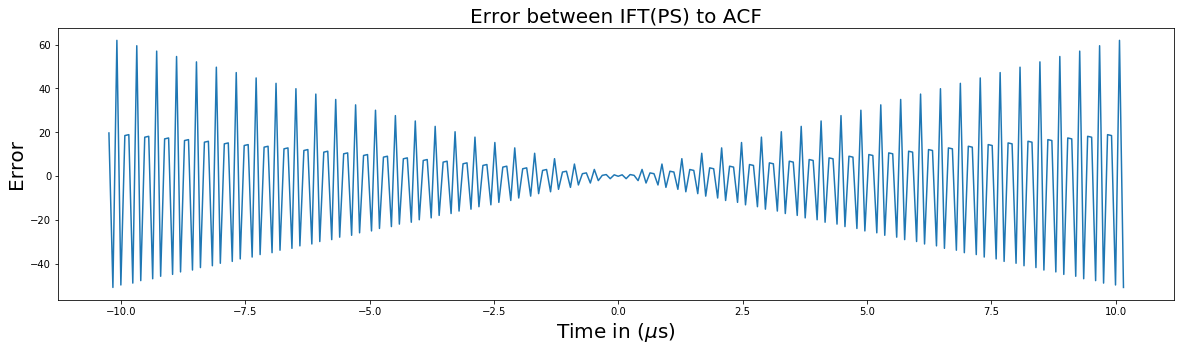

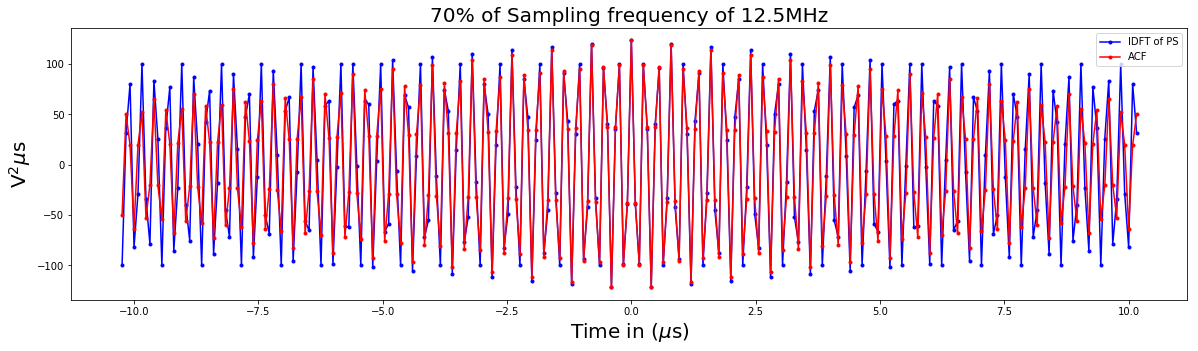

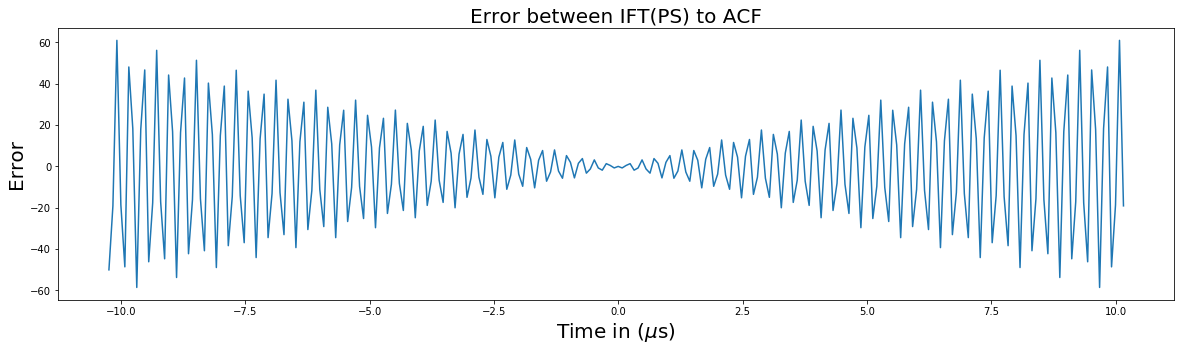

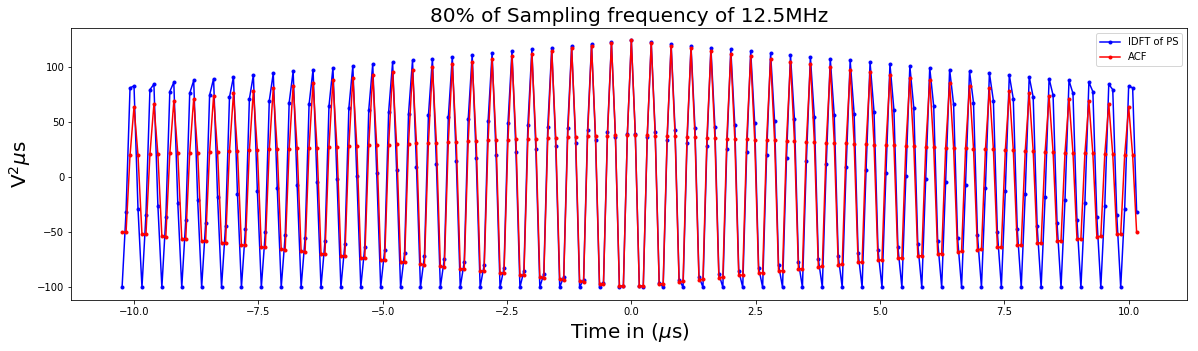

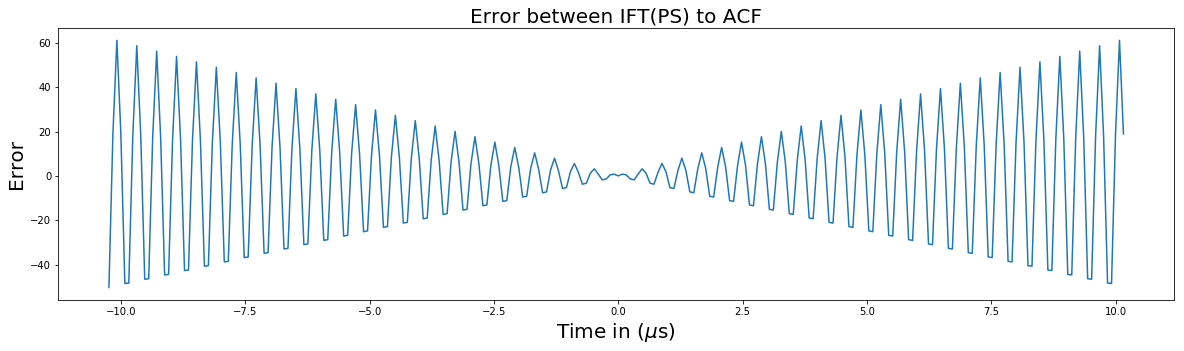

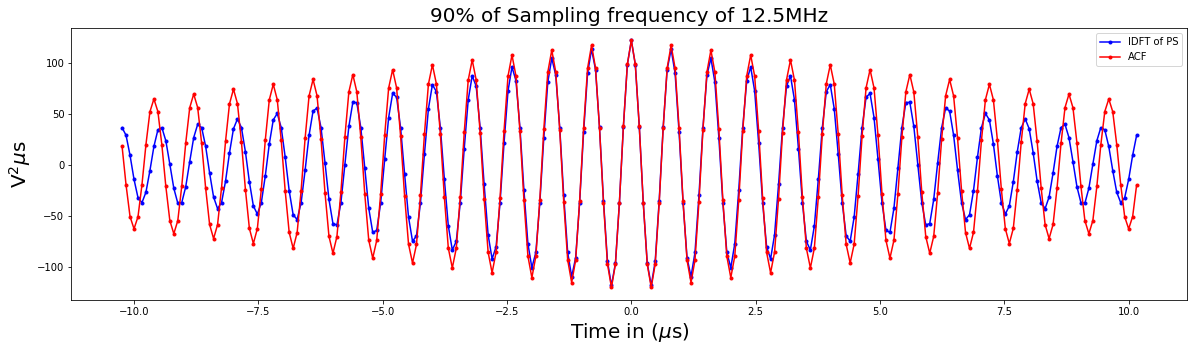

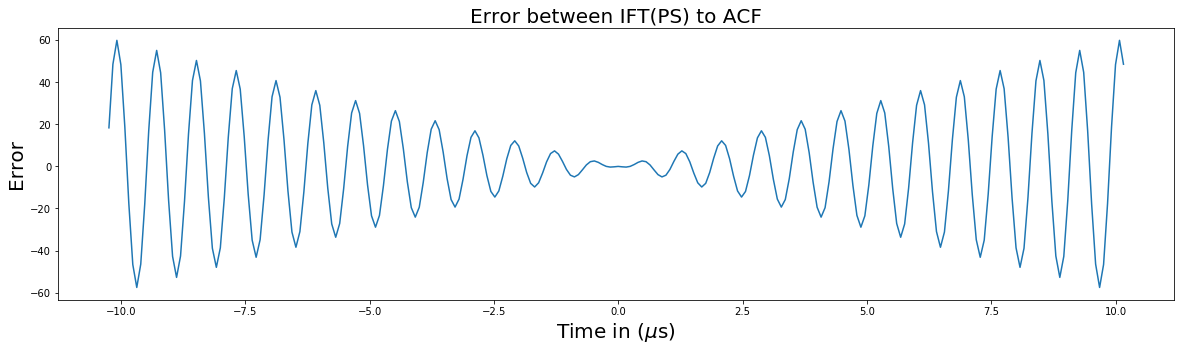

In [95]:
###THIS ILLUSTRATES IDFT(POWER_SPECTRA) == ACF
for i in range(1,10):
    x = ARR[i-1][50:50+N]/2**13
    ACF = np.correlate(x,x,'same')

    GG = idft(power_spectra(N)[i-1],f,t)
    
    kevin = (GG[1].real-ACF.real)



    plt.figure(figsize=(20,5))
    plt.plot(t/1e-6,GG[1].real,'b.-')
    plt.plot(t/1e-6,ACF,'r.-')
    plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize=20)
    plt.xlabel('Time in ($\mu$s)',fontsize =20)
    plt.ylabel('V$^2$$\mu$s',fontsize=20)
    plt.legend(['IDFT of PS','ACF'],loc = 'upper right')
    plt.figure(figsize=(20,5))
    plt.plot(t/1e-6,kevin)
    plt.xlabel('Time in ($\mu$s)',fontsize =20)
    plt.ylabel('Error',fontsize =20)
    plt.title('Error between IFT(PS) to ACF',fontsize = 20)
    plt.show()
    
 

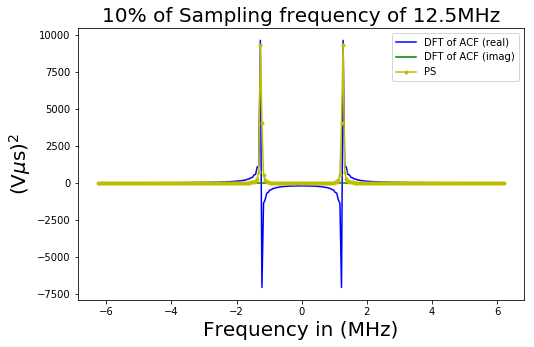

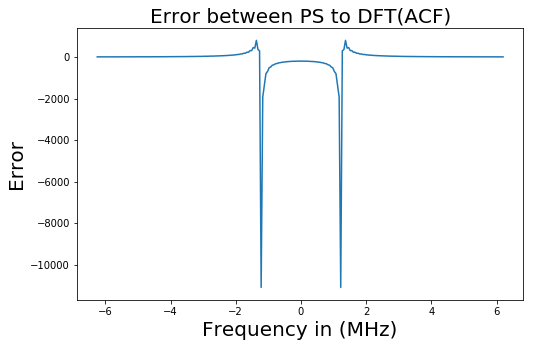

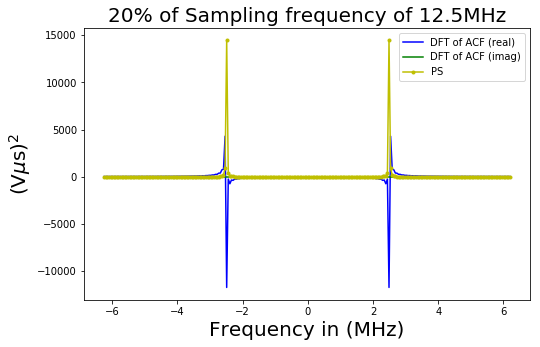

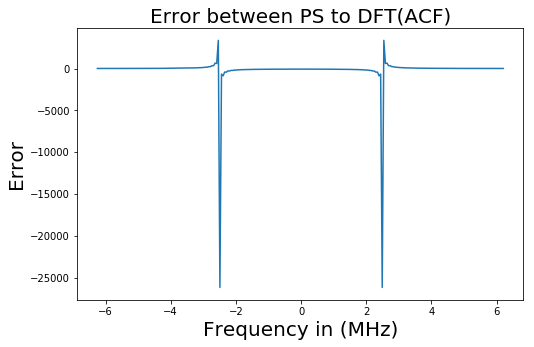

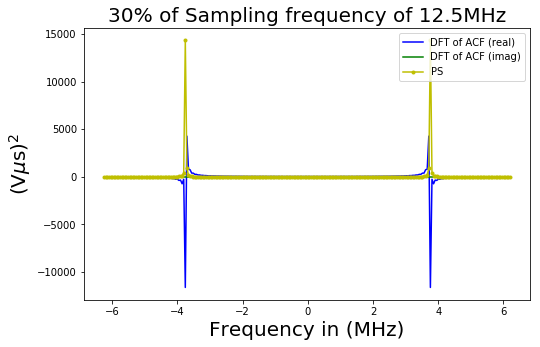

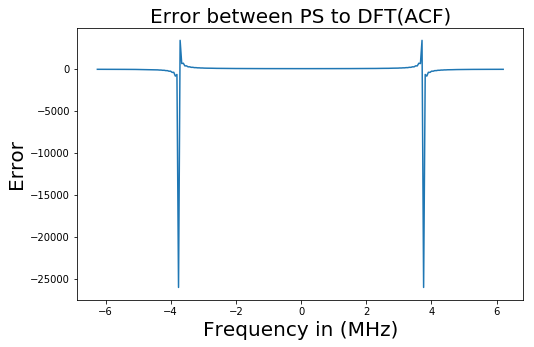

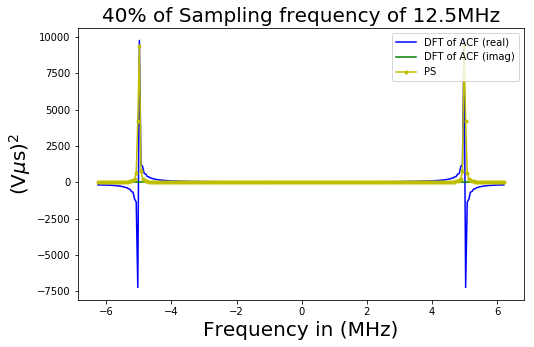

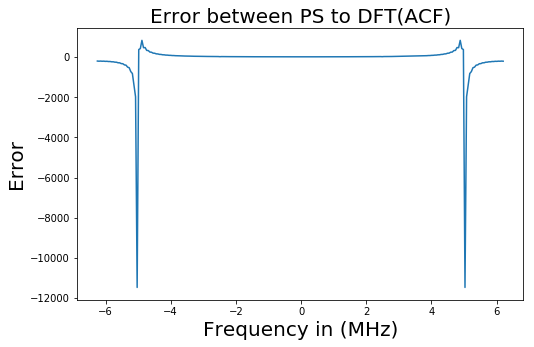

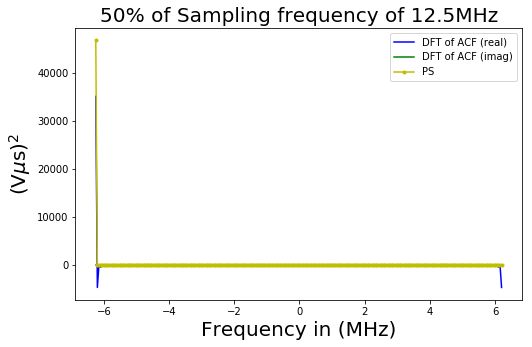

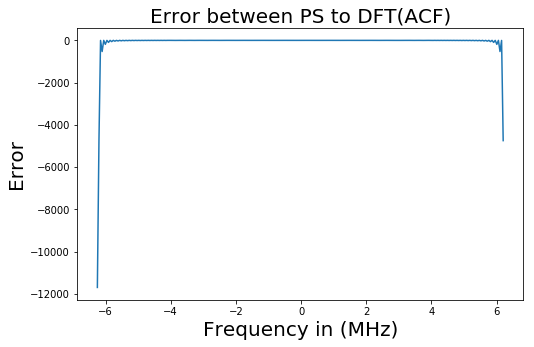

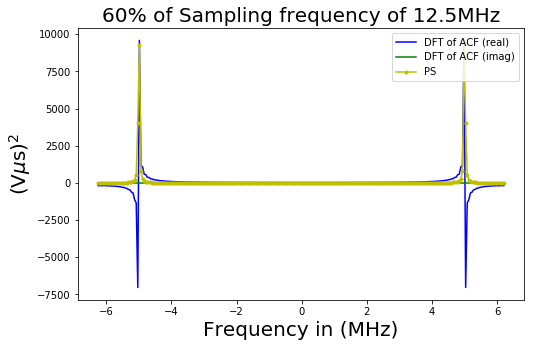

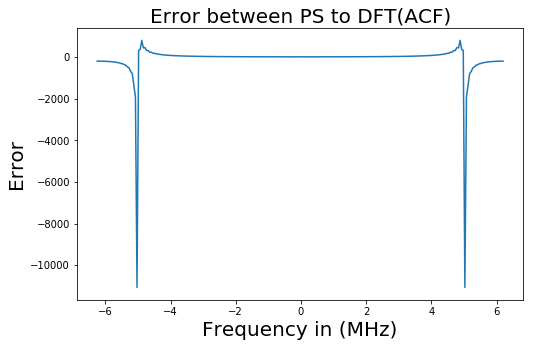

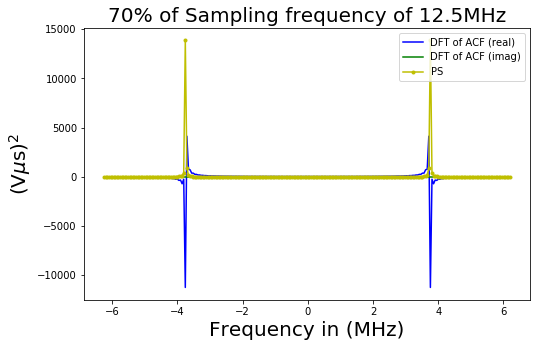

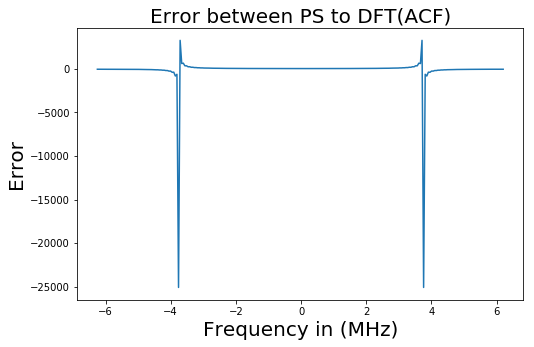

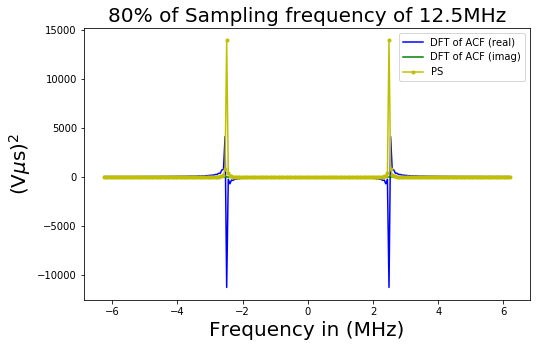

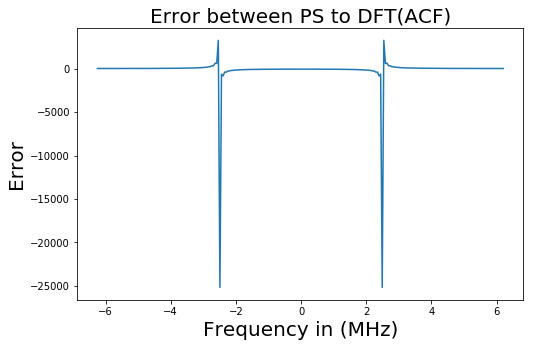

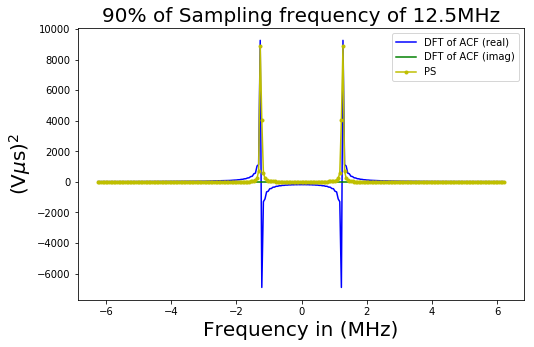

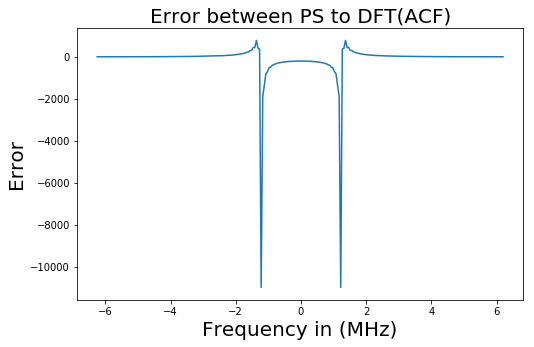

In [102]:
###THIS ILLUSTRATES POWER_SPECTRA == DFT(ACF)
for i in range(1,10):
    x = ARR[i-1][50:50+N]/2**13
    ACF = np.correlate(x,x,'same')

    GG = dft(ACF,t,f)
    
    error = (GG[1].real-power_spectra(N)[i-1])



    plt.figure(figsize=(8,5))
    plt.plot(f/1e6,GG[1].real,'b')
    plt.plot(f/1e6,GG[1].imag,'g')

    plt.plot(f/1e6,power_spectra(N)[i-1],'y.-')
    plt.title(str(i) + '0% of Sampling frequency of 12.5MHz',fontsize = 20)
    plt.xlabel('Frequency in (MHz)',fontsize = 20)
    plt.ylabel('(V$\mu$s)$^2$',fontsize = 20)
    plt.legend(['DFT of ACF (real)','DFT of ACF (imag)','PS'],loc = 'upper right')
    plt.figure(figsize=(8,5))
    plt.plot(f/1e6,error)
    plt.xlabel('Frequency in (MHz)',fontsize =20)
    plt.ylabel('Error',fontsize =20)
    plt.title('Error between PS to DFT(ACF)',fontsize = 20)
    plt.show()

In [34]:
##FTs pf NOISE

In [125]:
Arr = np.load('arr_0.npy')
arr = np.load('arr_1.npy')

In [126]:
###1

import matplotlib.pyplot as plt
import numpy as np
Arr = Arr/2**13
Vmean = np.mean(Arr)
print(Vmean)
Vmeansqr = np.mean([i**2 for i in Arr])
print(Vmeansqr)
Vrms = np.sqrt(Vmeansqr)
print(Vrms)





0.03725
0.1003828125
0.31683246756


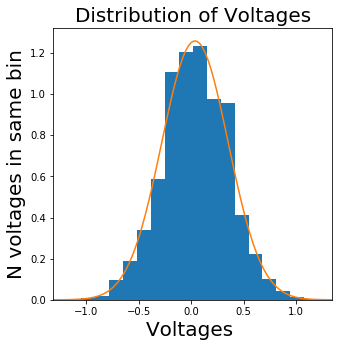

In [128]:
###2
from matplotlib.pyplot import mlab
import scipy as sp 
from scipy import stats 
from scipy.stats import norm



plt.figure(figsize=(5,5))
plt.hist(Arr,bins=20,normed=True)
plt.xlim((min(Arr), max(Arr)))


x = np.linspace(min(Arr),max(Arr),100)
plt.plot(x,mlab.normpdf(x,Vmean,Vrms))
plt.title('Distribution of Voltages',fontsize = 20)
plt.xlabel('Voltages ',fontsize = 20)
plt.ylabel('N voltages in same bin',fontsize = 20)
plt.show()


In [55]:
###3
def power_spectra_block(n):
    N = 16000
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,n):
        pf = []
        EF = dft(arr[i-1]/2**13,t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    if n > 33:
        print("not a valid input")
    return np.array(PF)


In [59]:
def get_PS_plots_block(n):
    v_samp = 12.5e6
    N = 16000
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    GG = [np.mean(i) for i in zip(*power_spectra_block(n))]

    plt.figure(figsize=(5,5))
       
    plt.plot(f/1e6,GG)
    plt.xlabel("Frequency in (MHz)", fontsize= 20)
    plt.ylabel("(V$\mu$)$^2$", fontsize = 20)
    plt.title('Average Power Spectra  of ' + str(n-1) + ' Blocks',fontsize = 20)
    plt.show()
    

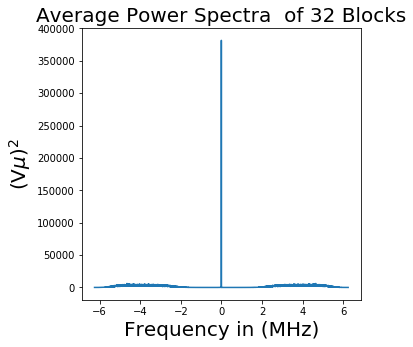

In [60]:
get_PS_plots_block(33)

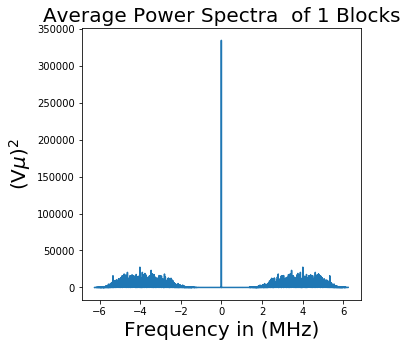

In [61]:
get_PS_plots_block(2)

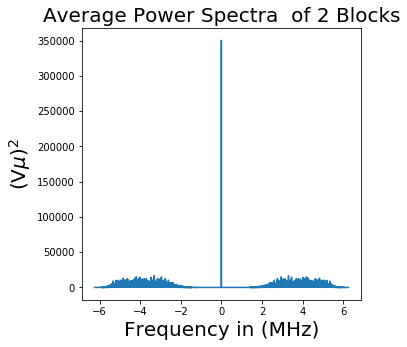

In [62]:
get_PS_plots_block(3)

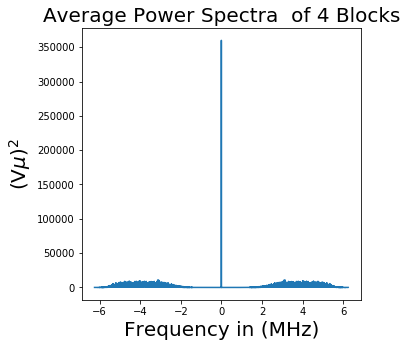

In [63]:
get_PS_plots_block(5)

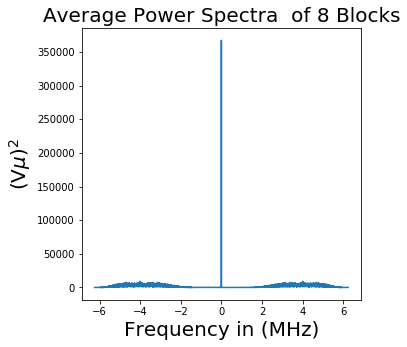

In [64]:
get_PS_plots_block(9)

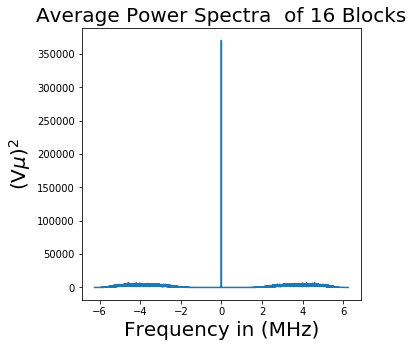

In [65]:
get_PS_plots_block(17)

In [104]:
def power_spectra_block(n):
    N = 16000
    PF = []
    v_samp = 12.5e6
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,n):
        pf = []
        EF = dft(arr[i-1]/2**13,t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    
    return np.array(PF)

In [130]:
N = 16000
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 


In [131]:
#### Edenś centroid OP code 

def peak_finder(signal_array):
    threshold = 17000
    peaks = []                            #x positions of the peaks, or rather, their index
    for i in range(2,len(signal_array)-2): 
        if signal_array[i] > signal_array[i+2]  and signal_array[i] > signal_array[i+1] and signal_array[i] > signal_array[i-1] and signal_array[i] > signal_array[i-2]:  #four conditions to be a peak (see description)
            if signal_array[i] > threshold:                      #is the value of the spectrum at i higher than our threshold?
                peaks.append(i)
    return peaks
    
#print('peaks at:',peak_finder(data1y))
#print('peak intensities are:', peak_finder(data1y))

def centroid(x_range,y_range):
    '''A function to return the centroid given equally sized x and y ranges over which to perform the calculation'''
    x_range = np.array(x_range) #make sure these are arrays if they aren't already
    y_range = np.array(y_range) #make sure these are arrays if they aren't already
    ... #convert the math formula for a centroid into code in these lines
    x_centroid = sum(x_range*y_range)/(sum(y_range))
    return x_centroid

def find_all_centroids(x_range,y_range):
	peaks = peak_finder(y_range) #define the peak positions in x indicies
	multicen = [] #empty array to append
	for i in peaks: #for loops for indicies in peaks
		y = y_range[i] #define the y which uses the y-axis indicies
		halfmax = y/2 #half of each peaks
		print(halfmax)
		multicen.append(centroid(x_range[i-4:i+4],y_range[i-4:i+4]))
		#The following codes are for more general way:
		#dr = np.where(y_range[i:] < halfmax)[0][0] # everything to the right after half of each peaks
		#dl = np.where(y_range[:i] < halfmax)[0][-1] # everything to the left
		#multicen.append(centroid(x_range[dl:i+dr], y_range[dl:i+dr])) #append centroid back
	return multicen #returns multicen = [] with each newl updated centroid

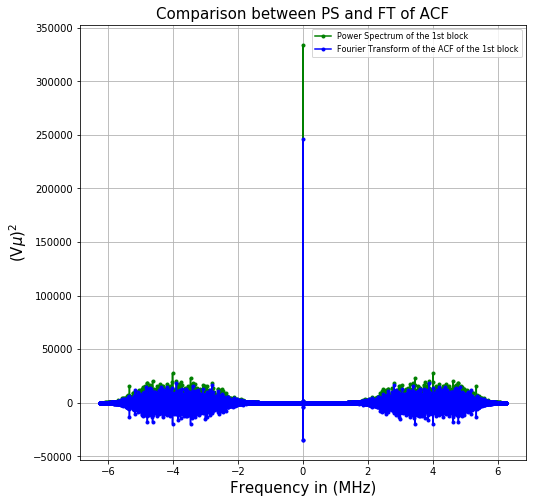

In [143]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = arr[0]/2**13
acf = np.correlate(x, x, mode='same')
yee = dft(acf,t,f)
# plot ACF
fig = plt.figure(figsize = (8 ,8))

plt.plot(f/1e6,power_spectra_block(2)[0],'g.-')

plt.plot(f/1e6,yee[1].real,'b.-')
plt.xlabel('Frequency in (MHz)',fontsize = 15)
plt.ylabel('(V$\mu$)$^2$',fontsize=15)
#plt.xlim(-.005,0.005)
plt.legend(['Power Spectrum of the 1st block','Fourier Transform of the ACF of the 1st block'],loc='upper right',fontsize=8)
plt.title('Comparison between PS and FT of ACF',fontsize=15)
plt.grid()






In [134]:
FWHM = find_all_centroids(f/1e6,power_spectra_block(2)[0])

9091.86265939
9014.41002331
10189.6102093
8530.73997679
8761.36714235
9734.58466547
13695.903801
10203.0268383
8561.9742236
9468.62722673
11548.2248662
9212.34223696
8676.97681309
9077.47403761
167096.191895
9077.47403761
8676.97681309
9212.34223696
11548.2248662
9468.62722673
8561.9742236
10203.0268383
13695.903801
9734.58466547
8761.36714235
8530.73997679
10189.6102093
9014.41002331
9091.86265939


In [135]:
AFWHM = find_all_centroids(f/1e6,yee[1].real)

9320.90154412
123243.656738
9320.90154412


[ -3.89361235e+00  -8.15478118e-06   3.89404335e+00]
[-3.8939759452150633, -5.5497231358191293e-07, 3.8939216617739358]
[  0.99990663  14.69403244   1.00003125]


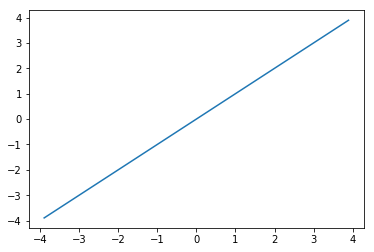

In [144]:
#7  14  21
#print(np.array(FWHM))
print(np.array(AFWHM))

fwhmarr = []
fwhmarr.append(np.array(FWHM)[7])
fwhmarr.append(np.array(FWHM)[14])
fwhmarr.append(np.array(FWHM)[21])

print(fwhmarr)

x = np.mean(fwhmarr)
y = np.mean(np.array(AFWHM))
m = np.array(AFWHM)/fwhmarr
print(m)
plt.plot(fwhmarr,np.array(AFWHM))
plt.show()

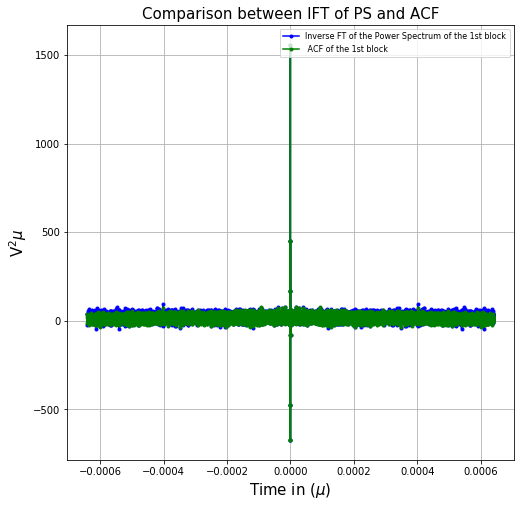

In [144]:
x = arr[0]/2**13
acf = np.correlate(x, x, mode='same')
yee = idft(power_spectra_block(2)[0],f,t)
# plot ACF
fig = plt.figure(figsize = (8, 8))

#plt.stem(kappa, acf)
plt.plot(t,yee[1].real,'b.-')

plt.plot(t,acf,'g.-')

plt.xlabel('Time in ($\mu$)',fontsize = 15)
plt.ylabel('V$^2$$\mu$',fontsize=15)
plt.legend(['Inverse FT of the Power Spectrum of the 1st block',' ACF of the 1st block'],loc='upper right',fontsize=8)
plt.title('Comparison between IFT of PS and ACF',fontsize=15)
plt.grid()

##5.1

In [158]:
data_105 = np.genfromtxt('5_1_10_5.txt')/(2.**15)
data_95 = np.genfromtxt('5_1_9_5.txt')/(2.**15)

len(data_95)

32000

In [159]:
def power_spectra(signal,v_samp,N):
    PF = []
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,10):
        pf = []
        EF = dft(signal[0:N],t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    return PF

In [201]:
def get_PS_plots(signal,v_samp,N):
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    plt.figure(figsize=(6,5))
    plt.plot(f,power_spectra(signal,v_samp,N)[1],'b.-')
    plt.xlabel("Frequency in (MHz)", fontsize= 15)
    plt.ylabel("(V$\mu$s)$^2$", fontsize = 15)
    plt.title("Power Spectra",fontsize = 15)
    plt.show()
    

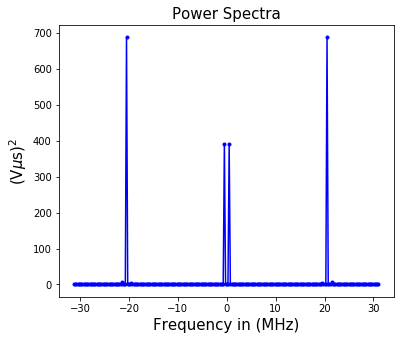

In [202]:
get_PS_plots( data_105, 62.5,2**8)

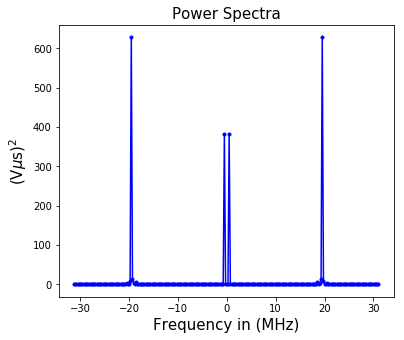

In [203]:
get_PS_plots(data_95,62.5,2**8)

In [210]:
def get_plot_signals(signal,v_samp,N):
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) 
    plt.figure(figsize=(6,5))
    plt.plot(t,signal[100:N+100],'b.-')
    plt.title('Waveform',fontsize=15)
    plt.xlabel('Time in $\mu$s',fontsize=15)
    plt.ylabel('Voltage (V)',fontsize=15)
    plt.show()

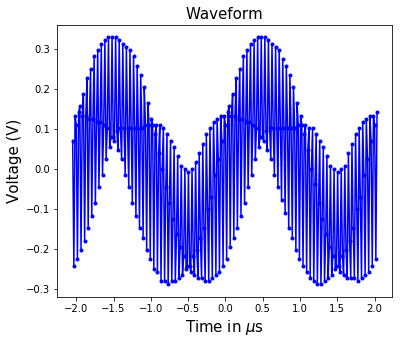

In [211]:
get_plot_signals(data_105,62.5,2**8)

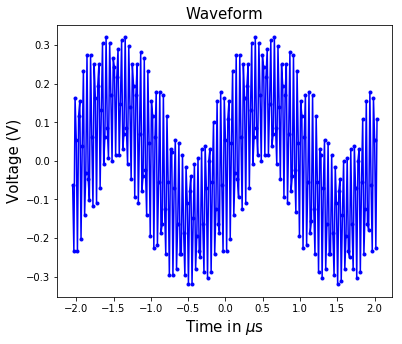

In [212]:
get_plot_signals(data_95,62.5,2**8)

In [213]:
def voltage_spectrum(signal,v_samp, N):
   
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 

    F = dft(signal[100:N+100],t,f,vsamp=62.5)
        
    return F[0], F[1]

In [218]:
def get_plot_VS(signal,v_samp,N):
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    plt.figure(figsize=(8,5))
    plt.plot(voltage_spectrum(signal,v_samp, N)[0],voltage_spectrum(signal,v_samp,N)[1].real,'r.-')
    plt.plot(voltage_spectrum(signal,v_samp, N)[0],voltage_spectrum(signal,v_samp,N)[1].imag,'b.-')
    plt.title("Voltage Spectrum",fontsize=15)
    plt.xlabel("Frequency in (MHz)",fontsize=15)
    plt.ylabel("V$\mu$s",fontsize=15)
    plt.show()

    

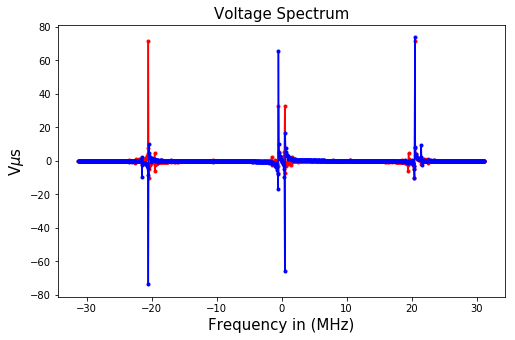

In [219]:
get_plot_VS(data_105,62.5,2**10)

In [221]:
N=2**10
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)



In [222]:
import numpy as np


W = voltage_spectrum(data_105,62.5,N)[0]
f_signal =  voltage_spectrum(data_105,62.5,N)[1]

#Cutting out the sums 
cut_f_signal = f_signal.copy()
cut_f_signal[(np.abs(W)>10)] = 0

cut_signal = idft(cut_f_signal,f,t)


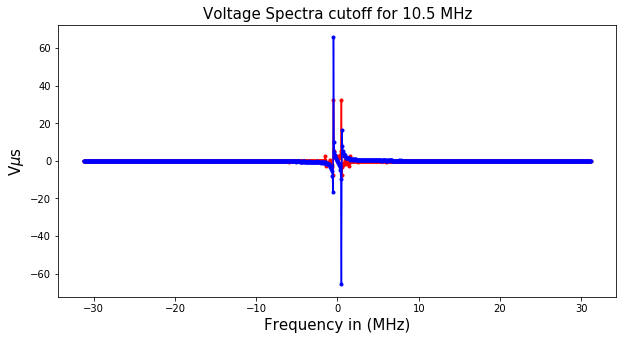

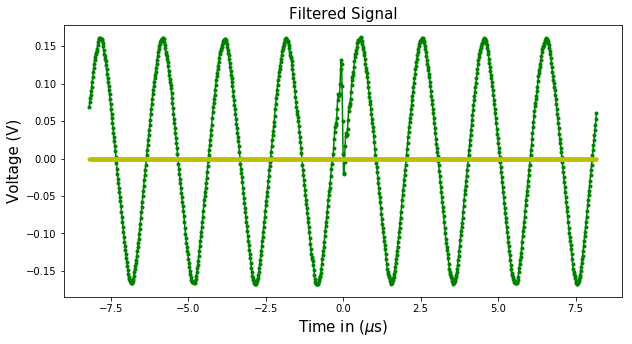

In [225]:
####plotting cutoff of voltage spectrum for 10.5 MHz
plt.figure(figsize=(10,5))
plt.plot(W,cut_f_signal.real,'r.-')
plt.plot(W,cut_f_signal.imag,'b.-')
plt.title('Voltage Spectra cutoff for 10.5 MHz',fontsize = 15)
plt.xlabel('Frequency in (MHz)',fontsize = 15)
plt.ylabel('V$\mu$s',fontsize = 15)

####Plotting Filtered Signal 
plt.figure(figsize=(10,5))
plt.plot(t/1e-6,cut_signal[1].real,'g.-')
plt.plot(t/1e-6,cut_signal[1].imag,'y.-')
plt.title('Filtered Signal',fontsize = 15)
plt.xlabel('Time in ($\mu$s)', fontsize = 15)
plt.ylabel('Voltage (V)',fontsize = 15)
plt.show()

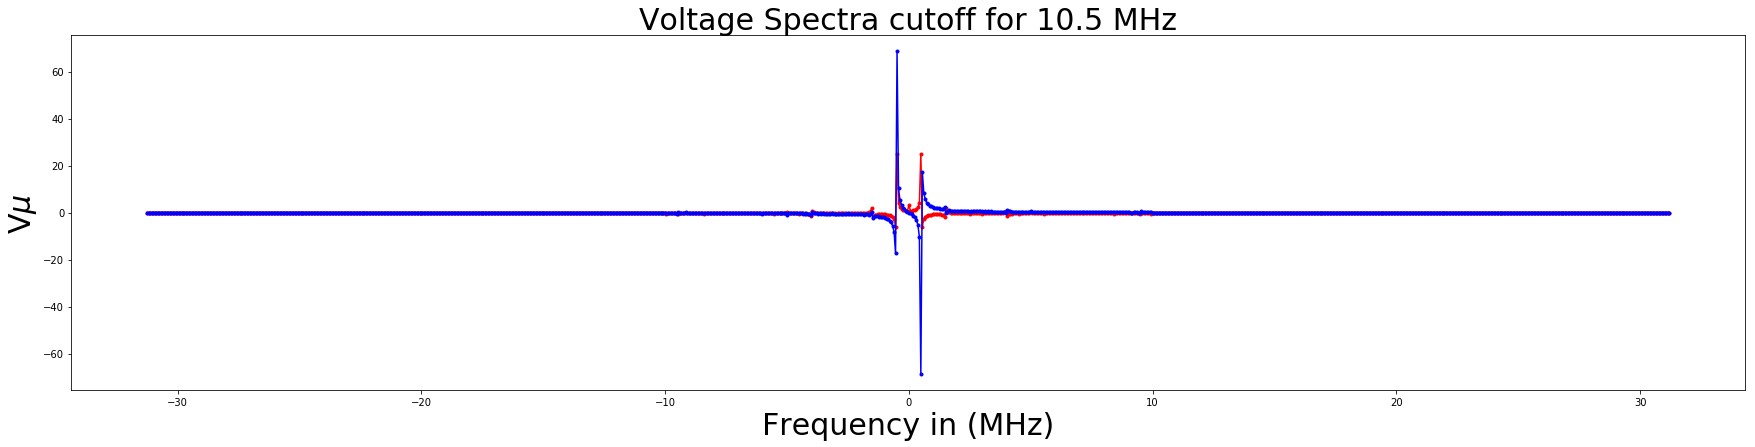

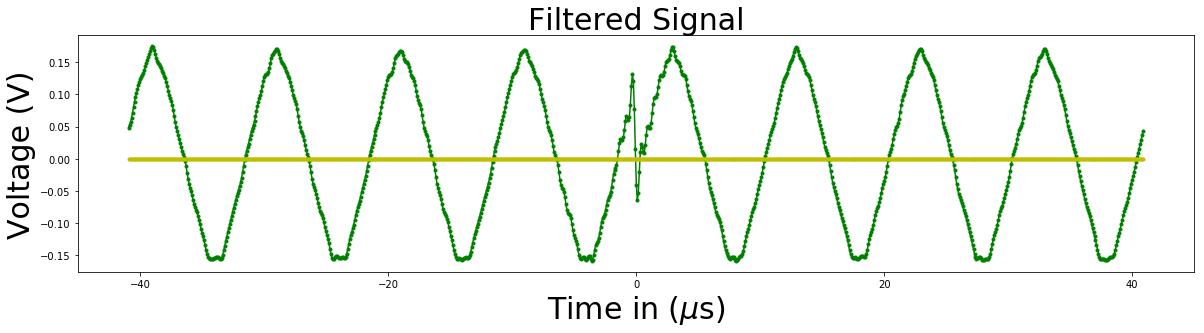

In [172]:
W = voltage_spectrum(data_95,62.5,N)[0]
f_signal =  voltage_spectrum(data_95,62.5,N)[1]

#Cutting out the sums 
cut_f_signal = f_signal.copy()
cut_f_signal[(np.abs(W)>10)] = 0

cut_signal = idft(cut_f_signal,f,t)

####plotting cutoff of voltage spectrum for 10.5 MHz
plt.figure(figsize=(30,30))
plt.subplot(411)
plt.plot(W,cut_f_signal.real,'r.-')
plt.plot(W,cut_f_signal.imag,'b.-')
plt.title('Voltage Spectra cutoff for 10.5 MHz',fontsize = 30)
plt.xlabel('Frequency in (MHz)',fontsize = 30)
plt.ylabel('V$\mu$',fontsize = 30)

####Plotting Filtered Signal 
plt.figure(figsize=(20,20))
plt.subplot(411)
plt.plot(t/1e-6,cut_signal[1].real,'g.-')
plt.plot(t/1e-6,cut_signal[1].imag,'y.-')
plt.title('Filtered Signal',fontsize = 30)
plt.xlabel('Time in ($\mu$s)', fontsize = 30)
plt.ylabel('Voltage (V)',fontsize = 30)
plt.show()

In [58]:
####5.2

In [173]:
def get_PS_plots_zoom(signal,v_samp,N):
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    plt.figure(figsize=(30,30))
    plt.subplot(411)
    plt.plot(f,power_spectra(signal,v_samp,N)[1],'b.-')
    plt.xlabel("Frequency in (MHz)", fontsize= 30)
    plt.ylabel("(V$\mu$)$^2$", fontsize = 30)
    plt.title("Zoom in Power Spectra",fontsize = 30)
    plt.ylim(0,30)
    plt.xlim(-3,3)
    plt.show()

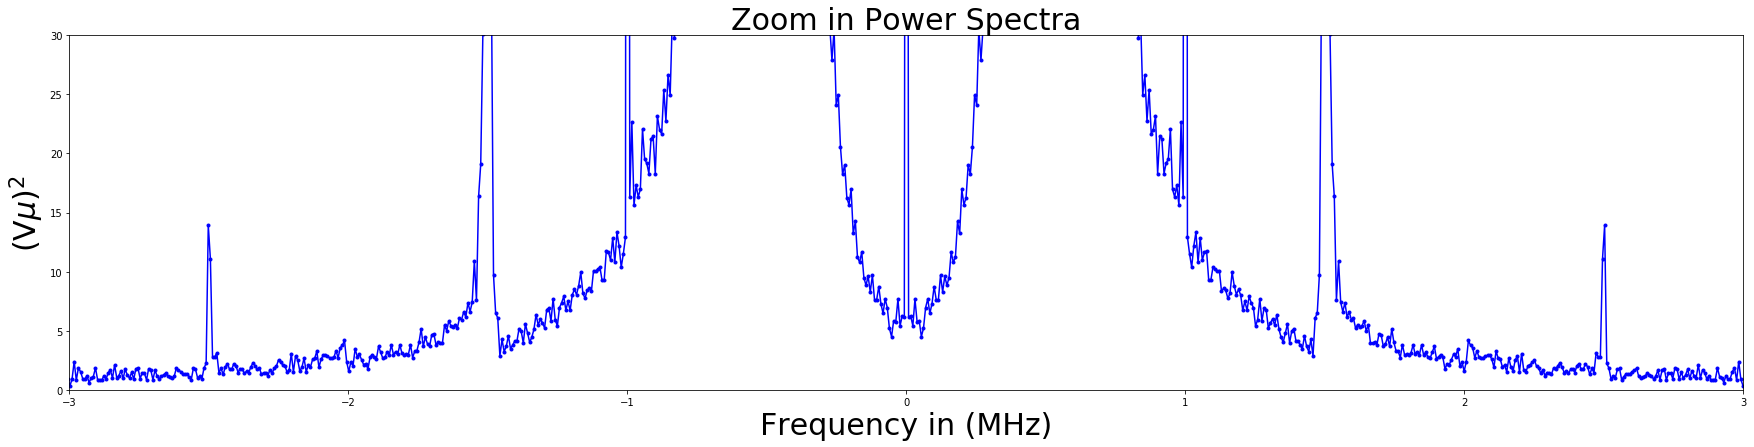

In [174]:
get_PS_plots_zoom(data_105,62.5,2**13)

In [175]:
####5.3
import numpy as np 
import cmath as cmath


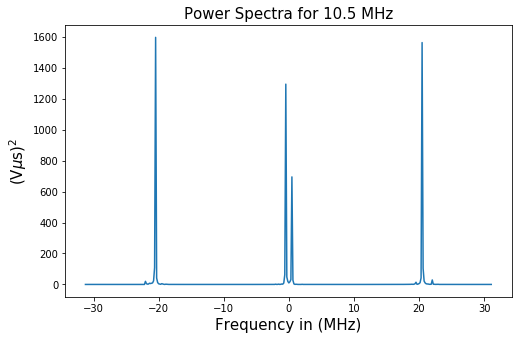

In [226]:
data_yit = np.genfromtxt('5_3_phase0_10_5.txt')/(2.**15)
data_yee = np.genfromtxt('5_3_phase0_9_5.txt')/(2.**15)
data_gig = np.genfromtxt('5_3_phase90_10_5.txt')/(2.**15)
data_lit = np.genfromtxt('5_3_phase90_9_5.txt')/(2.**15)
N = 400
v_samp = 62.5e6
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N)


kk = np.vectorize(complex)(data_yit, data_gig)
gg = dft(kk[0:N],f,t,vsamp = 62.5e6)

kk = np.abs(kk)**2
ll = np.abs(gg[1])**2

plt.figure(figsize=(8,5))
plt.title('Power Spectra for 10.5 MHz',fontsize = 15)
plt.ylabel('(V$\mu$s)$^2$',fontsize = 15)
plt.xlabel('Frequency in (MHz)',fontsize = 15)
plt.plot(f/1e6,ll)
plt.show()




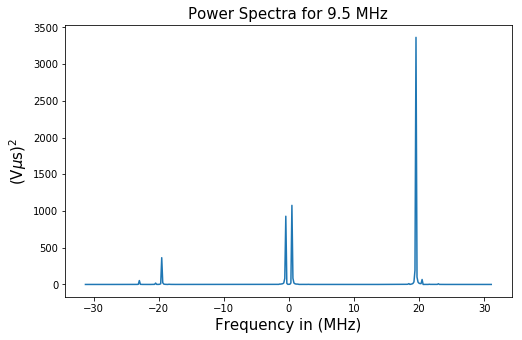

In [230]:
N = 400
v_samp = 62.5e6
f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N)


kk = np.vectorize(complex)(data_yee, data_lit)
gg = dft(kk[0:N],f,t,vsamp = 62.5e6)

kk = np.abs(kk)**2
ll = np.abs(gg[1])**2
plt.figure(figsize=(8,5))
plt.title('Power Spectra for 9.5 MHz',fontsize = 15)
plt.ylabel('(V$\mu$s)$^2$',fontsize = 15)
plt.xlabel('Frequency in (MHz)',fontsize = 15)
plt.plot(f/1e6,ll)
plt.show()

In [51]:
def power_spectra(signal,v_samp,N):
    PF = []
    t = np.linspace(-N/(2*v_samp),((N/2)-1)/v_samp,N) #time sample domain signal 
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)  #output sample frequency domain 
    for i in range(1,10):
        pf = []
        EF = dft(signal[50:N+50],t,f,vsamp=12.5e6)
        PF.append(pf)
        for comp in EF[1]:
            pf.append(np.abs(comp)**2)
    return PF

In [52]:
def get_PS_plots(v_samp,N,key, *argv):
    f = np.linspace(-v_samp/2,(1-2/N)*(v_samp/2),N)
    plt.figure(figsize=(10,5))
    set1 = plt.get_cmap('Set1')
    colors = iter(set1(np.linspace(0,1,5)))
    for arg in argv:
        plt.plot(f,power_spectra(arg,v_samp,N)[1],'.-', color = next(colors))
    plt.xlabel("Frequency in (MHz)", fontsize= 30)
    plt.ylabel("(V$\mu$s)$^2$", fontsize = 30)
    plt.title("Power Spectra",fontsize = 30)
    plt.legend(key)
    plt.show()

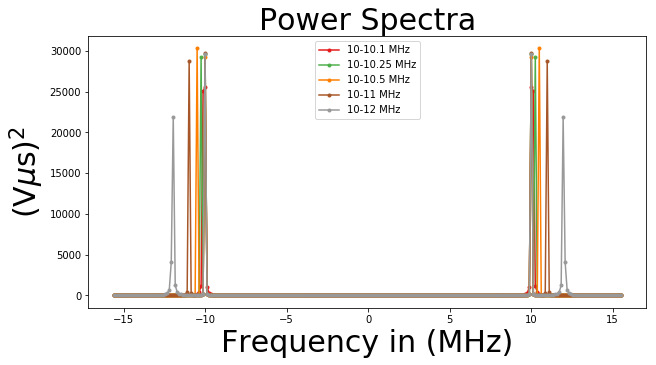

In [53]:
get_PS_plots(62.5/2,2**8, ['10-10.1 MHz','10-10.25 MHz','10-10.5 MHz','10-11 MHz','10-12 MHz'],
             data_10_10_1,data_10_10_25, data_10_10_5, data_10_11, data_10_12)

In [40]:
data_10_10_05 = np.load('3.5data10-10.05.npy')/2**13
data_10_10_1 = np.load('3.5data10-10.1.npy')/2**13
data_10_10_5 = np.load('3.5data10-10.5.npy')/2**13
data_10_11 = np.load('3.5data10-11.npy')/2**13
data_10_12 = np.load('3.5data10-12.npy')/2**13
data_10_13 = np.load('3.5data10-13.npy')/2**13
data_10_14 = np.load('3.5data10-14.npy')/2**13
data_10_15 = np.load('3.5data10-15.npy')/2**13
data_10_16 = np.load('3.5data10-16.npy')/2**13
data_10_10_25 = np.load('3.5data10-10.25.npy')/2**13


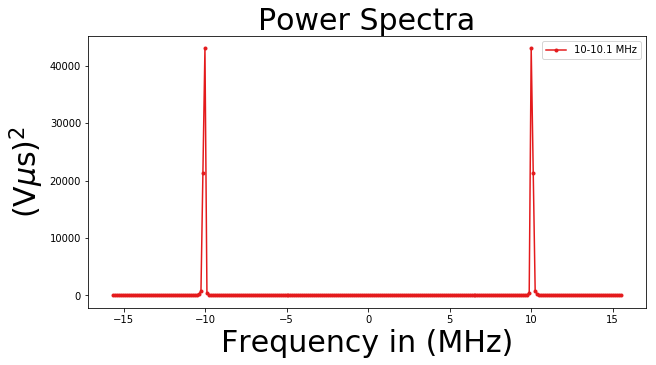

In [42]:
get_PS_plots(62.5/2,2**8, ['10-10.1 MHz'],
             data_10_10_1)